# Linear Regression - Car Price Prediction
## Comprehensive Data Preprocessing Pipeline


## 1. Import Libraries


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder # 
from sklearn.impute import SimpleImputer

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Statistical tests
from scipy import stats
from scipy.stats import pearsonr

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("All libraries imported successfully!")


All libraries imported successfully!


## 2. Load the Dataset


In [3]:
# Load the dataset
df = pd.read_csv('../../dataset/CAR DETAILS FROM CAR DEKHO.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
df.head()


Dataset loaded successfully!
Shape: (4340, 8)

First few rows:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## 3. Exploratory Data Analysis (EDA)


In [4]:
# Basic information about the dataset
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

print("\n" + "=" * 50)
print("COLUMN DATA TYPES")
print("=" * 50)
print(df.dtypes)

print("\n" + "=" * 50)
print("DATASET INFO")
print("=" * 50)
df.info()


DATASET INFORMATION

Dataset Shape: (4340, 8)
Number of Rows: 4340
Number of Columns: 8

COLUMN DATA TYPES
name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
# Statistical summary
print("=" * 50)
print("STATISTICAL SUMMARY")
print("=" * 50)
df.describe()


STATISTICAL SUMMARY


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
# Check for missing values
print("=" * 50)
print("MISSING VALUES ANALYSIS")
print("=" * 50)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

print(missing_df)
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")


MISSING VALUES ANALYSIS
          Column  Missing Count  Percentage
0           name              0         0.0
1           year              0         0.0
2  selling_price              0         0.0
3      km_driven              0         0.0
4           fuel              0         0.0
5    seller_type              0         0.0
6   transmission              0         0.0
7          owner              0         0.0

Total Missing Values: 0


In [7]:
# Check for duplicate rows
print("=" * 50)
print("DUPLICATE VALUES ANALYSIS")
print("=" * 50)

duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")
print(f"Percentage of Duplicates: {(duplicates/len(df))*100:.2f}%")

if duplicates > 0:
    print("\nSample of duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))


DUPLICATE VALUES ANALYSIS
Number of Duplicate Rows: 763
Percentage of Duplicates: 17.58%

Sample of duplicate rows:
                        name  year  selling_price  km_driven    fuel  \
0              Maruti 800 AC  2007          60000      70000  Petrol   
1   Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2       Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3     Datsun RediGO T Option  2017         250000      46000  Petrol   
4      Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
5       Maruti Alto LX BSIII  2007         140000     125000  Petrol   
6  Hyundai Xcent 1.2 Kappa S  2016         550000      25000  Petrol   
7   Tata Indigo Grand Petrol  2014         240000      60000  Petrol   
8   Hyundai Creta 1.6 VTVT S  2015         850000      25000  Petrol   
9   Maruti Celerio Green VXI  2017         365000      78000     CNG   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  In

In [8]:
# Analyze categorical columns
print("=" * 50)
print("CATEGORICAL COLUMNS ANALYSIS")
print("=" * 50)

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(f"Unique values: {df[col].nunique()}")
    print(df[col].value_counts())


CATEGORICAL COLUMNS ANALYSIS

NAME:
Unique values: 1491
name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

FUEL:
Unique values: 5
fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

SELLER_TYPE:
Unique values: 3
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

TRANSMISSION:
Unique values: 2
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

O

## 4. Data Visualization


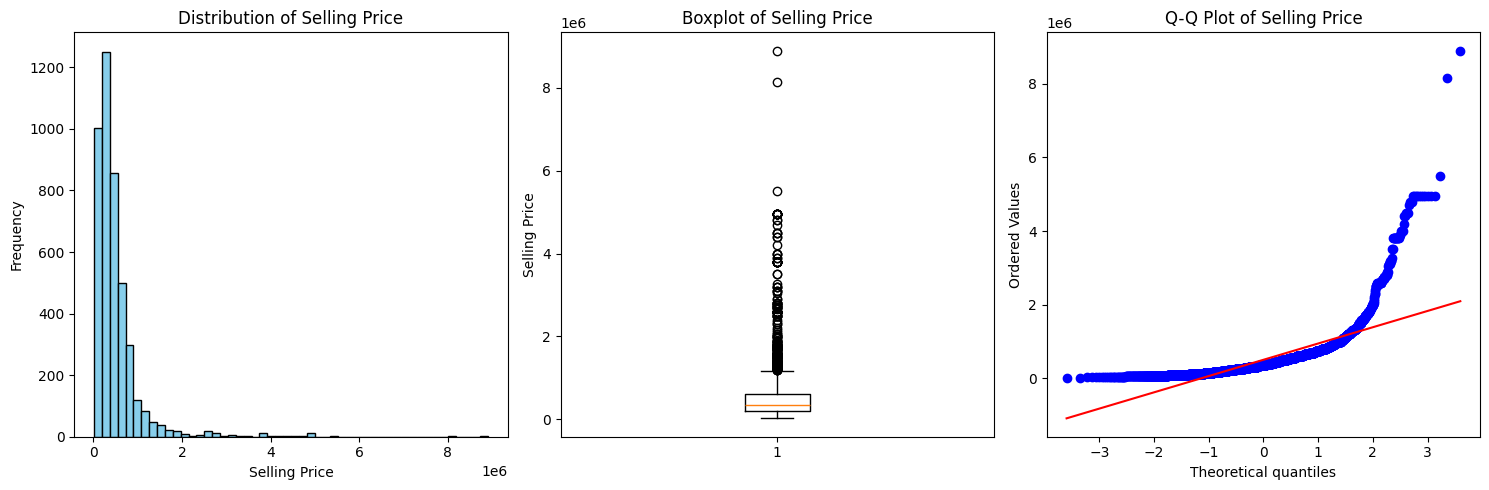

Selling Price - Skewness: 4.89
Selling Price - Kurtosis: 37.09


In [9]:
# Distribution of target variable (selling_price)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['selling_price'], bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price')

plt.subplot(1, 3, 2)
plt.boxplot(df['selling_price'], vert=True)
plt.ylabel('Selling Price')
plt.title('Boxplot of Selling Price')

plt.subplot(1, 3, 3)
stats.probplot(df['selling_price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Selling Price')

plt.tight_layout()
plt.show()

print(f"Selling Price - Skewness: {df['selling_price'].skew():.2f}")
print(f"Selling Price - Kurtosis: {df['selling_price'].kurtosis():.2f}")


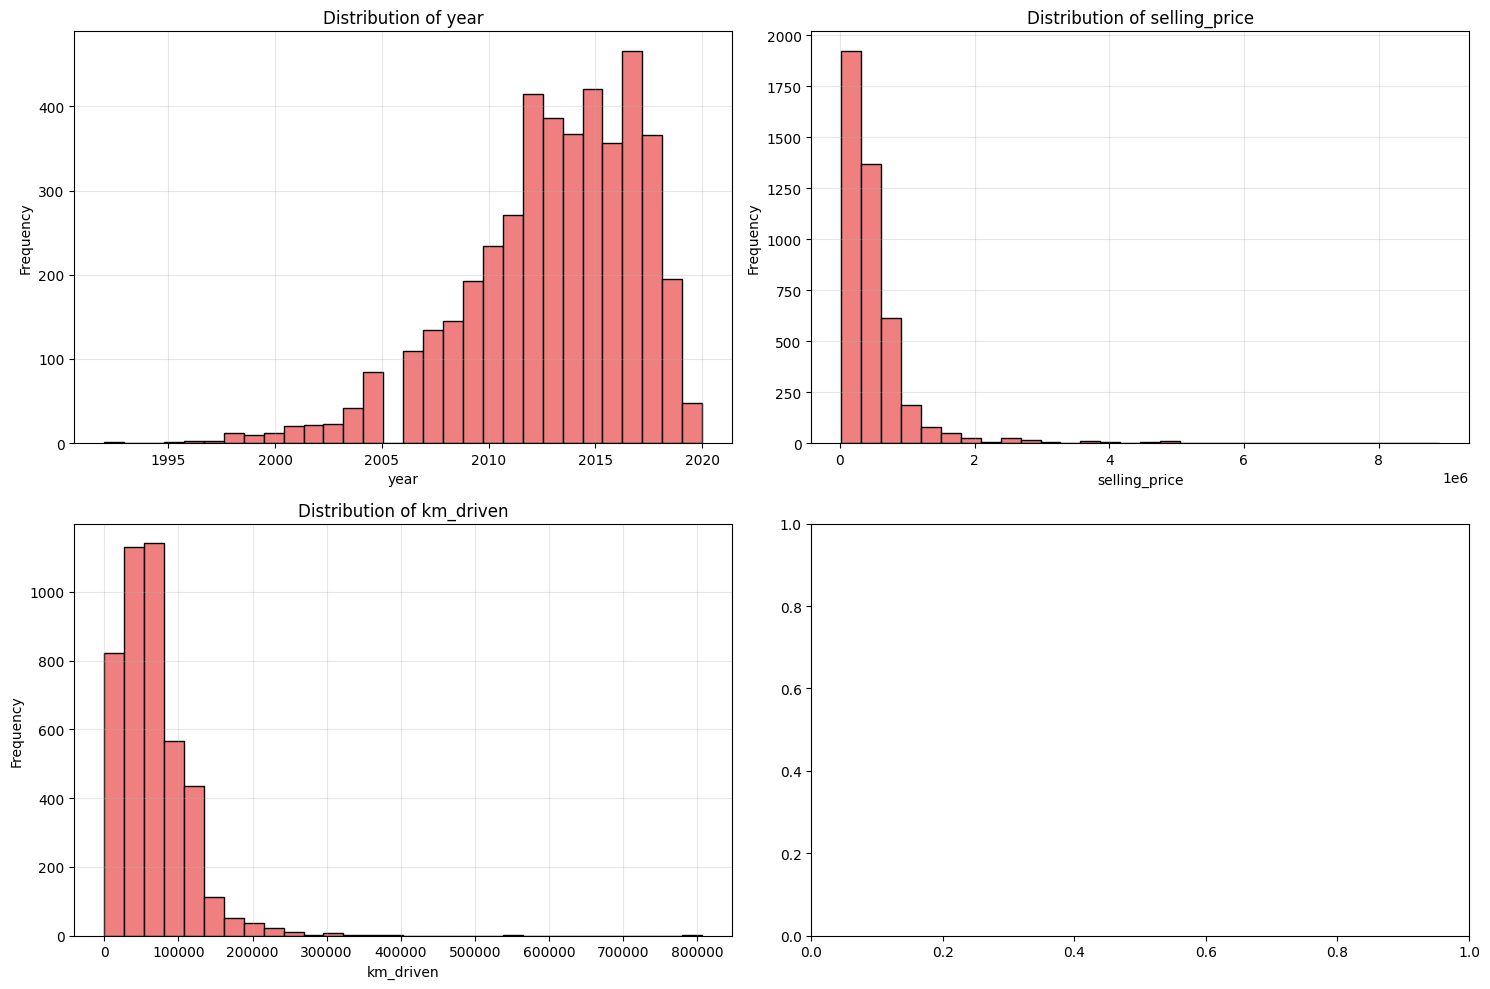

In [10]:
# Distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', color='lightcoral')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()


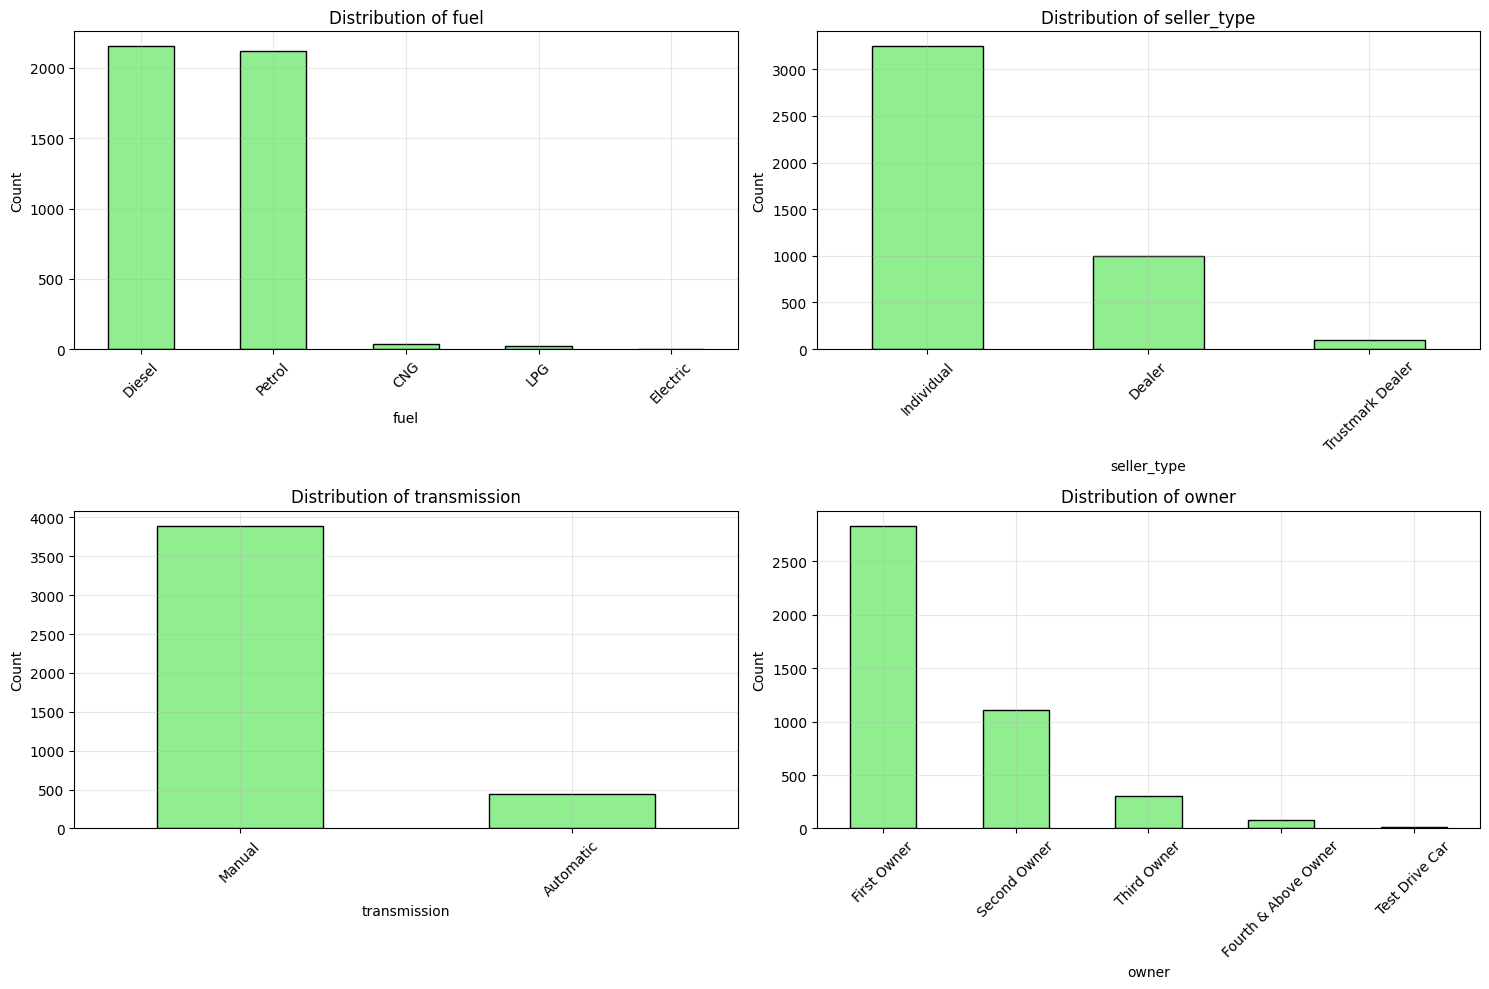

In [11]:
# Categorical features distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

categorical_cols_limited = ['fuel', 'seller_type', 'transmission', 'owner']

for idx, col in enumerate(categorical_cols_limited):
    df[col].value_counts().plot(kind='bar', ax=axes[idx], color='lightgreen', edgecolor='black')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()


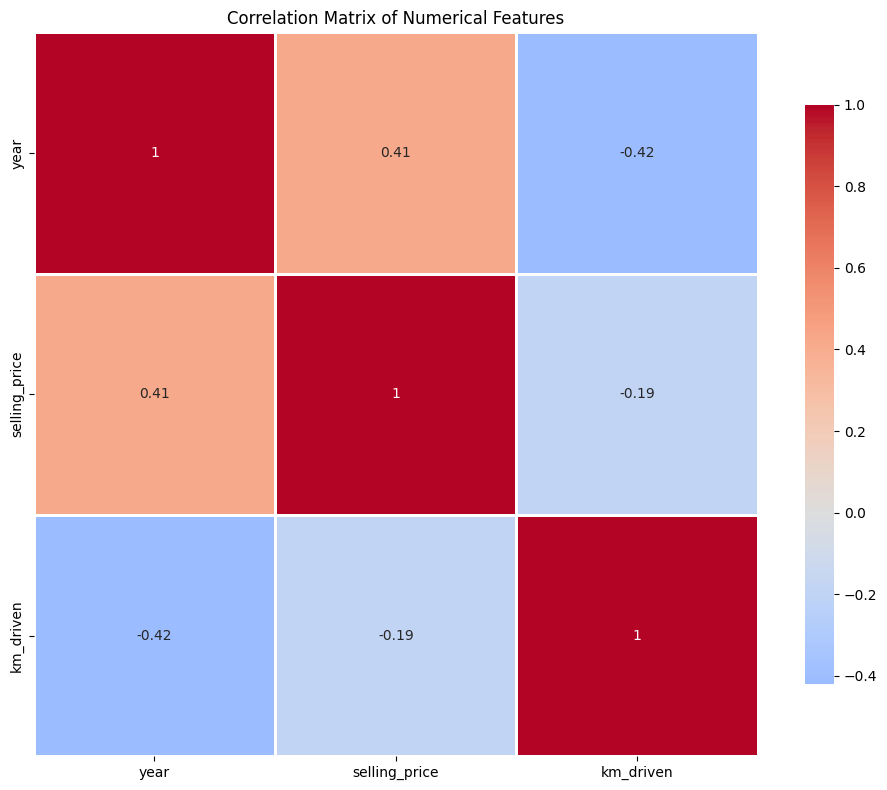


Correlation with Selling Price:
selling_price    1.000000
year             0.413922
km_driven       -0.192289
Name: selling_price, dtype: float64


In [13]:
# Correlation analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("\nCorrelation with Selling Price:")
print(correlation_matrix['selling_price'].sort_values(ascending=False))


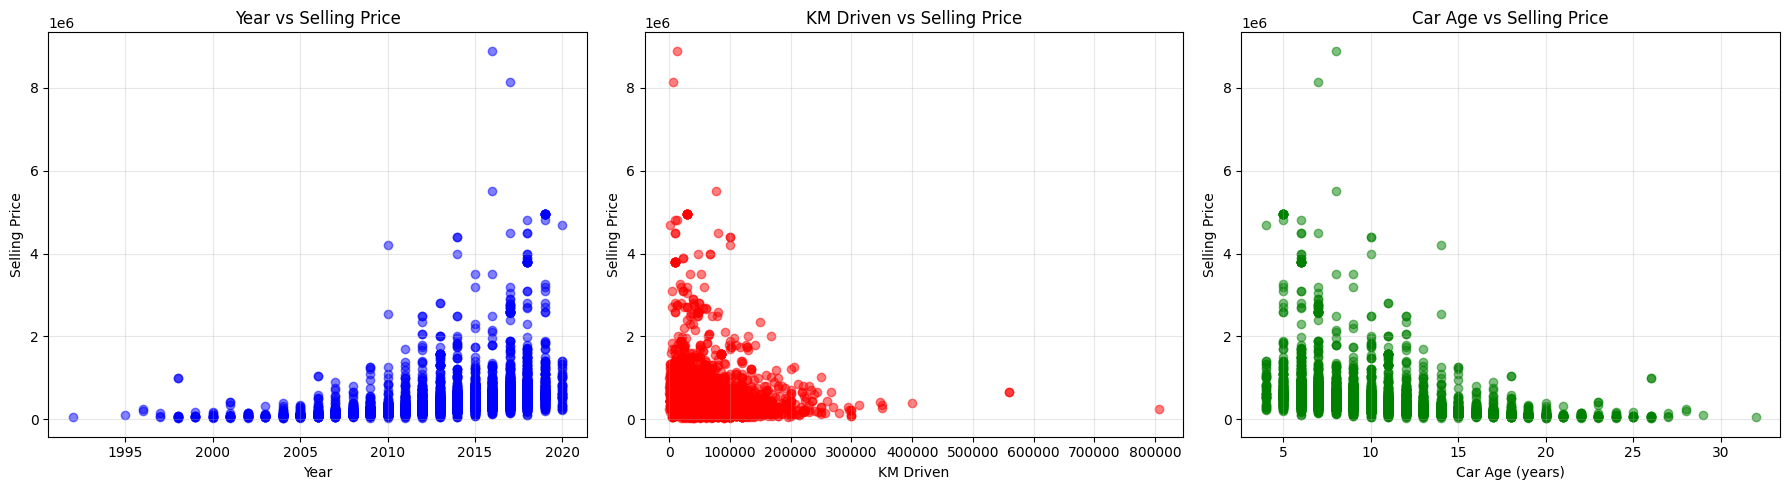

In [12]:
# Scatter plots for numerical features vs target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(df['year'], df['selling_price'], alpha=0.5, color='blue')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Selling Price')
axes[0].set_title('Year vs Selling Price')
axes[0].grid(alpha=0.3)

axes[1].scatter(df['km_driven'], df['selling_price'], alpha=0.5, color='red')
axes[1].set_xlabel('KM Driven')
axes[1].set_ylabel('Selling Price')
axes[1].set_title('KM Driven vs Selling Price')
axes[1].grid(alpha=0.3)

# Car age
car_age = 2024 - df['year']
axes[2].scatter(car_age, df['selling_price'], alpha=0.5, color='green')
axes[2].set_xlabel('Car Age (years)')
axes[2].set_ylabel('Selling Price')
axes[2].set_title('Car Age vs Selling Price')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Data Preprocessing - Cleaning


In [17]:
# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

print("Original shape:", df.shape)

# Remove duplicates
df_processed = df_processed.drop_duplicates()
print(f"After removing duplicates: {df_processed.shape}") 

# Handle missing values (if any)
if df_processed.isnull().sum().sum() > 0:
    print("\nHandling missing values...")
    # For numerical columns: fill with median
    numerical_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_cols:
        if df_processed[col].isnull().sum() > 0:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # For categorical columns: fill with mode
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_processed[col].isnull().sum() > 0:
            df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

print(f"\nMissing values after handling: {df_processed.isnull().sum().sum()}")


Original shape: (4340, 8)
After removing duplicates: (3577, 8)

Missing values after handling: 0


## 6. Feature Engineering


In [18]:
# Extract brand from car name
df_processed['brand'] = df_processed['name'].str.split().str[0]

print("Unique brands:", df_processed['brand'].nunique())
print("\nTop 10 brands:")
print(df_processed['brand'].value_counts().head(10))


Unique brands: 29

Top 10 brands:
brand
Maruti        1072
Hyundai        637
Mahindra       328
Tata           308
Ford           220
Honda          216
Toyota         170
Chevrolet      151
Renault        110
Volkswagen      93
Name: count, dtype: int64


In [19]:
# Create car age feature
current_year = 2025
df_processed['car_age'] = current_year - df_processed['year']

print(f"Car age statistics:")
print(df_processed['car_age'].describe())

# Create bins for car age
df_processed['age_category'] = pd.cut(df_processed['car_age'], 
                                       bins=[0, 3, 5, 10, 20, 100],
                                       labels=['Very New', 'New', 'Medium', 'Old', 'Very Old'])

print("\nAge category distribution:")
print(df_processed['age_category'].value_counts())


Car age statistics:
count    3577.000000
mean       12.037462
std         4.251759
min         5.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        33.000000
Name: car_age, dtype: float64

Age category distribution:
age_category
Old         1983
Medium      1418
Very Old     131
New           45
Very New       0
Name: count, dtype: int64


In [20]:
# Create km_per_year feature
df_processed['km_per_year'] = df_processed['km_driven'] / (df_processed['car_age'] + 1)  # +1 to avoid division by zero

print("KM per year statistics:")
print(df_processed['km_per_year'].describe())


KM per year statistics:
count     3577.000000
mean      5250.909312
std       3314.904591
min          0.083333
25%       3090.352941
50%       4744.647059
75%       6666.666667
max      56000.000000
Name: km_per_year, dtype: float64


In [21]:
# Create price category for analysis
df_processed['price_category'] = pd.cut(df_processed['selling_price'], 
                                         bins=[0, 300000, 600000, 1000000, float('inf')],
                                         labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])

print("Price category distribution:")
print(df_processed['price_category'].value_counts())


Price category distribution:
price_category
Budget       1592
Mid-range    1168
Premium       571
Luxury        246
Name: count, dtype: int64


## 7. Outlier Detection and Treatment


In [ ]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].x(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in numerical columns
numerical_columns = ['selling_price', 'km_driven', 'car_age', 'km_per_year']

print("=" * 50)
print("OUTLIER DETECTION")
print("=" * 50)

outlier_info = {}

for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(df_processed, col)
    outlier_info[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df_processed)) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({(len(outliers)/len(df_processed)*100):.2f}%)")
    print(f"  Lower Bound: {lower:.2f}")
    print(f"  Upper Bound: {upper:.2f}")


OUTLIER DETECTION

selling_price:
  Outliers: 170 (4.75%)
  Lower Bound: -400000.00
  Upper Bound: 1200000.00

km_driven:
  Outliers: 106 (2.96%)
  Lower Bound: -45000.00
  Upper Bound: 171000.00

car_age:
  Outliers: 37 (1.03%)
  Lower Bound: 0.00
  Upper Bound: 24.00

km_per_year:
  Outliers: 127 (3.55%)
  Lower Bound: -2274.12
  Upper Bound: 12031.14


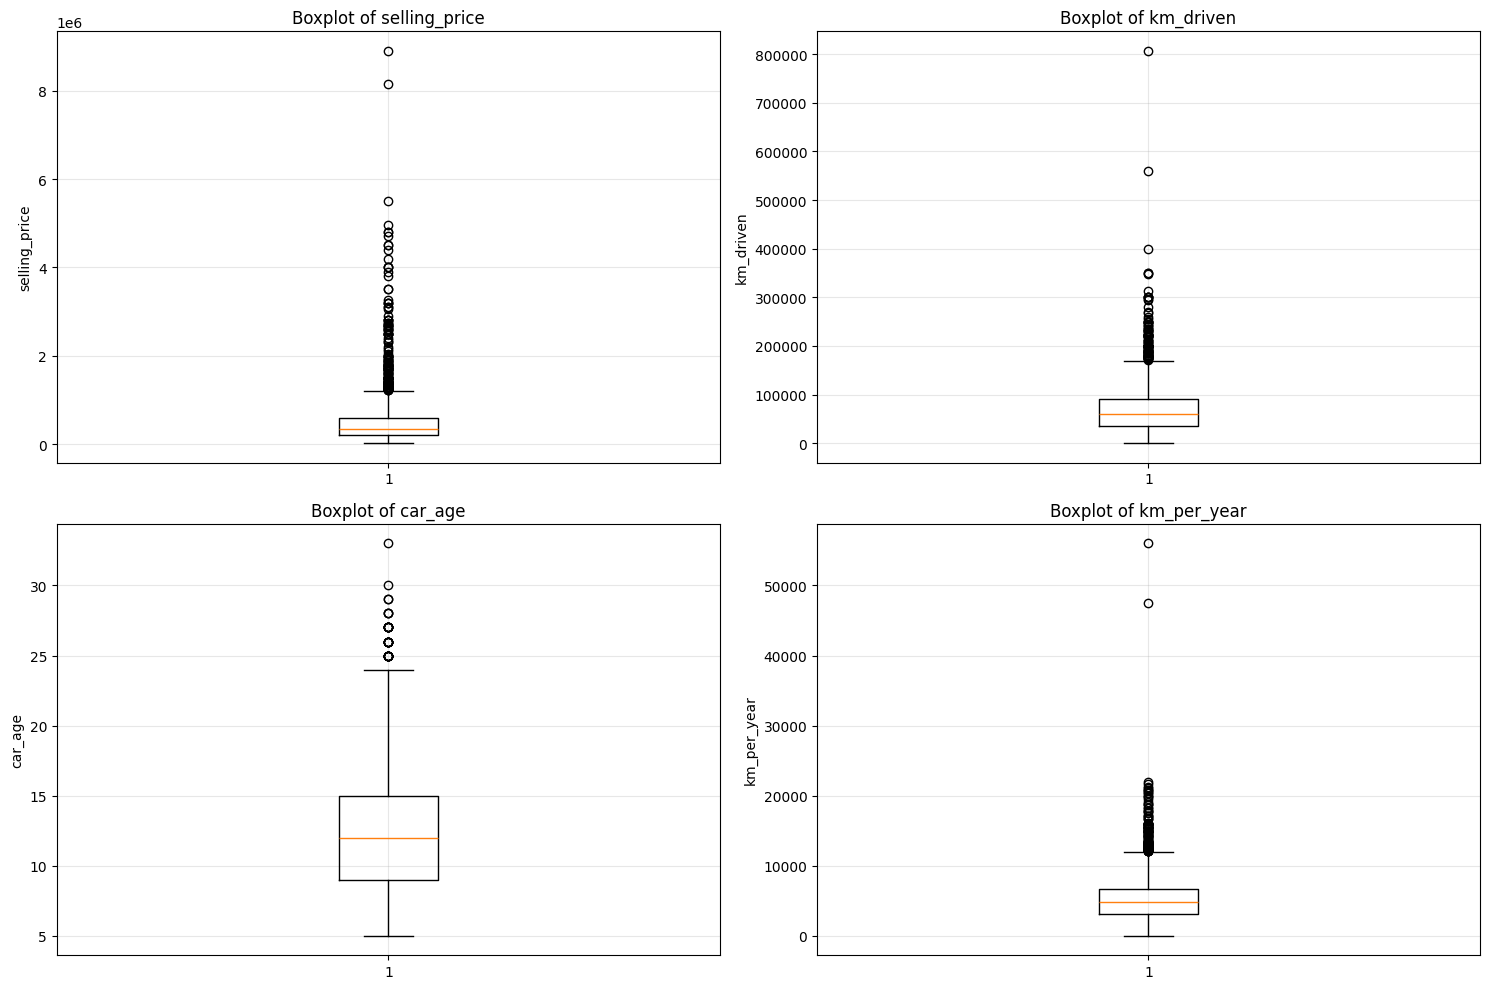

In [23]:
# Visualize outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_columns):
    axes[idx].boxplot(df_processed[col], vert=True)
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'Boxplot of {col}')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [24]:
# Handle outliers using capping method (Winsorization)
df_no_outliers = df_processed.copy()

for col in numerical_columns:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers
    df_no_outliers[col] = np.where(df_no_outliers[col] < lower_bound, lower_bound, df_no_outliers[col])
    df_no_outliers[col] = np.where(df_no_outliers[col] > upper_bound, upper_bound, df_no_outliers[col])

print("Outliers capped successfully!")
print(f"Shape after outlier treatment: {df_no_outliers.shape}")


Outliers capped successfully!
Shape after outlier treatment: (3577, 13)


## 8. Encoding Categorical Variables


In [28]:
# Prepare dataframe for encoding
df_encoded = df_no_outliers.copy()

# Drop columns that won't be used in modeling
columns_to_drop = ['name', 'age_category', 'price_category']
df_encoded = df_encoded.drop(columns=columns_to_drop)

print("Columns after dropping unnecessary features:")
print(df_encoded.columns.tolist())


Columns after dropping unnecessary features:
['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'brand', 'car_age', 'km_per_year']


In [29]:
# Label Encoding for ordinal features (owner)
label_encoder = LabelEncoder()

# Owner has ordinal relationship
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 0
}

df_encoded['owner_encoded'] = df_encoded['owner'].map(owner_mapping)

print("Owner encoding:")
print(df_encoded[['owner', 'owner_encoded']].drop_duplicates().sort_values('owner_encoded'))


Owner encoding:
                     owner  owner_encoded
1714        Test Drive Car              0
0              First Owner              1
4             Second Owner              2
44             Third Owner              3
42    Fourth & Above Owner              4


In [30]:
# One-Hot Encoding for nominal categorical features
categorical_features = ['fuel', 'seller_type', 'transmission', 'brand']

print(f"Performing One-Hot Encoding for: {categorical_features}")
print(f"Shape before encoding: {df_encoded.shape}")

df_encoded = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)

print(f"Shape after encoding: {df_encoded.shape}")

# Drop original owner column
df_encoded = df_encoded.drop('owner', axis=1)

print("\nColumns after encoding:")
print(df_encoded.columns.tolist())


Performing One-Hot Encoding for: ['fuel', 'seller_type', 'transmission', 'brand']
Shape before encoding: (3577, 11)
Shape after encoding: (3577, 42)

Columns after encoding:
['year', 'selling_price', 'km_driven', 'car_age', 'km_per_year', 'owner_encoded', 'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'brand_Audi', 'brand_BMW', 'brand_Chevrolet', 'brand_Daewoo', 'brand_Datsun', 'brand_Fiat', 'brand_Force', 'brand_Ford', 'brand_Honda', 'brand_Hyundai', 'brand_Isuzu', 'brand_Jaguar', 'brand_Jeep', 'brand_Kia', 'brand_Land', 'brand_MG', 'brand_Mahindra', 'brand_Maruti', 'brand_Mercedes-Benz', 'brand_Mitsubishi', 'brand_Nissan', 'brand_OpelCorsa', 'brand_Renault', 'brand_Skoda', 'brand_Tata', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo']


## 9. Feature Selection and Correlation Analysis


CORRELATION WITH SELLING PRICE
selling_price                   1.000000
year                            0.597463
fuel_Diesel                     0.368010
brand_Audi                      0.227841
brand_Toyota                    0.201856
brand_BMW                       0.190676
brand_Mercedes-Benz             0.161077
brand_Mahindra                  0.144410
seller_type_Trustmark Dealer    0.097969
brand_Land                      0.095618
brand_Jaguar                    0.095618
brand_Honda                     0.089128
brand_Volvo                     0.085511
brand_Jeep                      0.074044
brand_Ford                      0.066723
brand_MG                        0.060449
brand_Mitsubishi                0.051269
brand_Kia                       0.042738
brand_Isuzu                     0.042738
brand_Skoda                     0.017711
brand_Volkswagen                0.016147
brand_Nissan                    0.009624
brand_Force                    -0.004680
fuel_Electric             

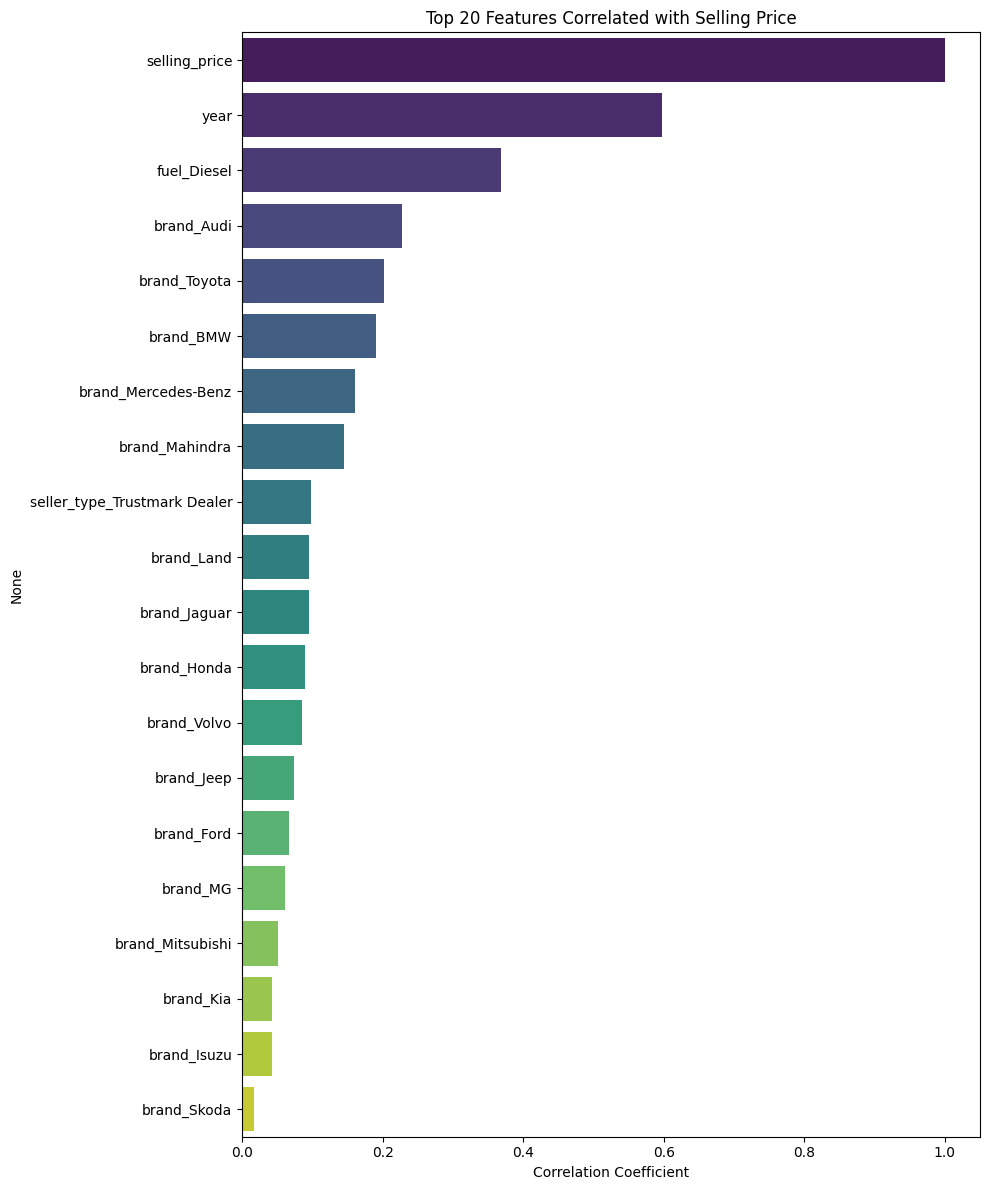

In [31]:
# Correlation with target variable
correlations = df_encoded.corr()['selling_price'].sort_values(ascending=False)

print("=" * 50)
print("CORRELATION WITH SELLING PRICE")
print("=" * 50)
print(correlations)

# Visualize top correlations
plt.figure(figsize=(10, 12))
top_features = correlations.head(20)
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.xlabel('Correlation Coefficient')
plt.title('Top 20 Features Correlated with Selling Price')
plt.tight_layout()
plt.show()


In [32]:
# Check for multicollinearity
# Remove selling_price for correlation matrix
features_for_multicollinearity = df_encoded.drop('selling_price', axis=1)

# Calculate correlation matrix
correlation_matrix = features_for_multicollinearity.corr()

# Find highly correlated features
high_corr_features = []
threshold = 0.8

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_features.append((colname_i, colname_j, correlation_matrix.iloc[i, j]))

print("=" * 50)
print("HIGHLY CORRELATED FEATURE PAIRS (threshold > 0.8)")
print("=" * 50)

if high_corr_features:
    for feat1, feat2, corr_val in high_corr_features:
        print(f"{feat1} <-> {feat2}: {corr_val:.3f}")
else:
    print("No highly correlated feature pairs found.")


HIGHLY CORRELATED FEATURE PAIRS (threshold > 0.8)
car_age <-> year: -0.998
km_per_year <-> km_driven: 0.887
fuel_Petrol <-> fuel_Diesel: -0.967


## 10. Train-Test Split


In [33]:
# Separate features and target
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set percentage: {(X_train.shape[0]/X.shape[0])*100:.1f}%")
print(f"Testing set percentage: {(X_test.shape[0]/X.shape[0])*100:.1f}%")


Features shape: (3577, 40)
Target shape: (3577,)

Training set size: 2861 samples
Testing set size: 716 samples

Training set percentage: 80.0%
Testing set percentage: 20.0%


## 11. Feature Scaling


In [34]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed!")
print(f"\nTraining data shape: {X_train_scaled.shape}")
print(f"Testing data shape: {X_test_scaled.shape}")

print("\nSample of scaled training data:")
print(X_train_scaled.head())


Feature scaling completed!

Training data shape: (2861, 40)
Testing data shape: (716, 40)

Sample of scaled training data:
          year  km_driven   car_age  km_per_year  owner_encoded  fuel_Diesel  \
2348  0.245936   1.653780 -0.244710     2.171392      -0.668295     0.984393   
1250  0.955234  -1.184183 -0.969968    -1.046893       0.681982    -1.015854   
955  -1.409091  -0.197066  1.447558    -0.713338       3.382537    -1.015854   
4044  0.245936  -0.098354 -0.244710     0.062178       0.681982    -1.015854   
988   1.191666   0.000358 -1.211721     1.191053      -0.668295    -1.015854   

      fuel_Electric  fuel_LPG  fuel_Petrol  seller_type_Individual  \
2348            0.0 -0.083903    -0.947879               -1.931043   
1250            0.0 -0.083903     1.054987                0.517855   
955             0.0 -0.083903     1.054987                0.517855   
4044            0.0 -0.083903     1.054987               -1.931043   
988             0.0 -0.083903     1.054987    

In [35]:
# Verify standardization
print("=" * 50)
print("VERIFICATION OF STANDARDIZATION")
print("=" * 50)

print("\nMean of scaled training features (should be close to 0):")
print(X_train_scaled.mean().head(10))

print("\nStandard deviation of scaled training features (should be close to 1):")
print(X_train_scaled.std().head(10))


VERIFICATION OF STANDARDIZATION

Mean of scaled training features (should be close to 0):
year                     -7.412145e-15
km_driven                 6.208867e-19
car_age                  -1.328698e-16
km_per_year               2.688439e-16
owner_encoded             8.257793e-17
fuel_Diesel              -2.359369e-17
fuel_Electric             0.000000e+00
fuel_LPG                  4.967094e-18
fuel_Petrol               3.725320e-18
seller_type_Individual    6.457222e-17
dtype: float64

Standard deviation of scaled training features (should be close to 1):
year                      1.000175
km_driven                 1.000175
car_age                   1.000175
km_per_year               1.000175
owner_encoded             1.000175
fuel_Diesel               1.000175
fuel_Electric             0.000000
fuel_LPG                  1.000175
fuel_Petrol               1.000175
seller_type_Individual    1.000175
dtype: float64


## 12. Linear Regression Model Training


In [36]:
# Create and train the Linear Regression model
lr_model = LinearRegression()

print("Training Linear Regression model...")
lr_model.fit(X_train_scaled, y_train)

print("Model trained successfully!")
print(f"\nIntercept: {lr_model.intercept_:.2f}")
print(f"Number of coefficients: {len(lr_model.coef_)}")


Training Linear Regression model...
Model trained successfully!

Intercept: 429249.00
Number of coefficients: 40


TOP 20 MOST IMPORTANT FEATURES
                Feature    Coefficient  Abs_Coefficient
2               car_age -313550.503254    313550.503254
0                  year -179101.392928    179101.392928
5           fuel_Diesel   95300.547769     95300.547769
37         brand_Toyota   66427.877009     66427.877009
11  transmission_Manual  -49579.327248     49579.327248
12           brand_Audi   48247.384576     48247.384576
1             km_driven  -39713.770793     39713.770793
13            brand_BMW   38340.988814     38340.988814
30  brand_Mercedes-Benz   33359.224370     33359.224370
28       brand_Mahindra   31492.023818     31492.023818
20          brand_Honda   27974.235347     27974.235347
23         brand_Jaguar   27084.501087     27084.501087
36           brand_Tata  -25102.945801     25102.945801
31     brand_Mitsubishi   23432.882369     23432.882369
26           brand_Land   23082.192715     23082.192715
24           brand_Jeep   19208.365493     19208.365493
39          brand

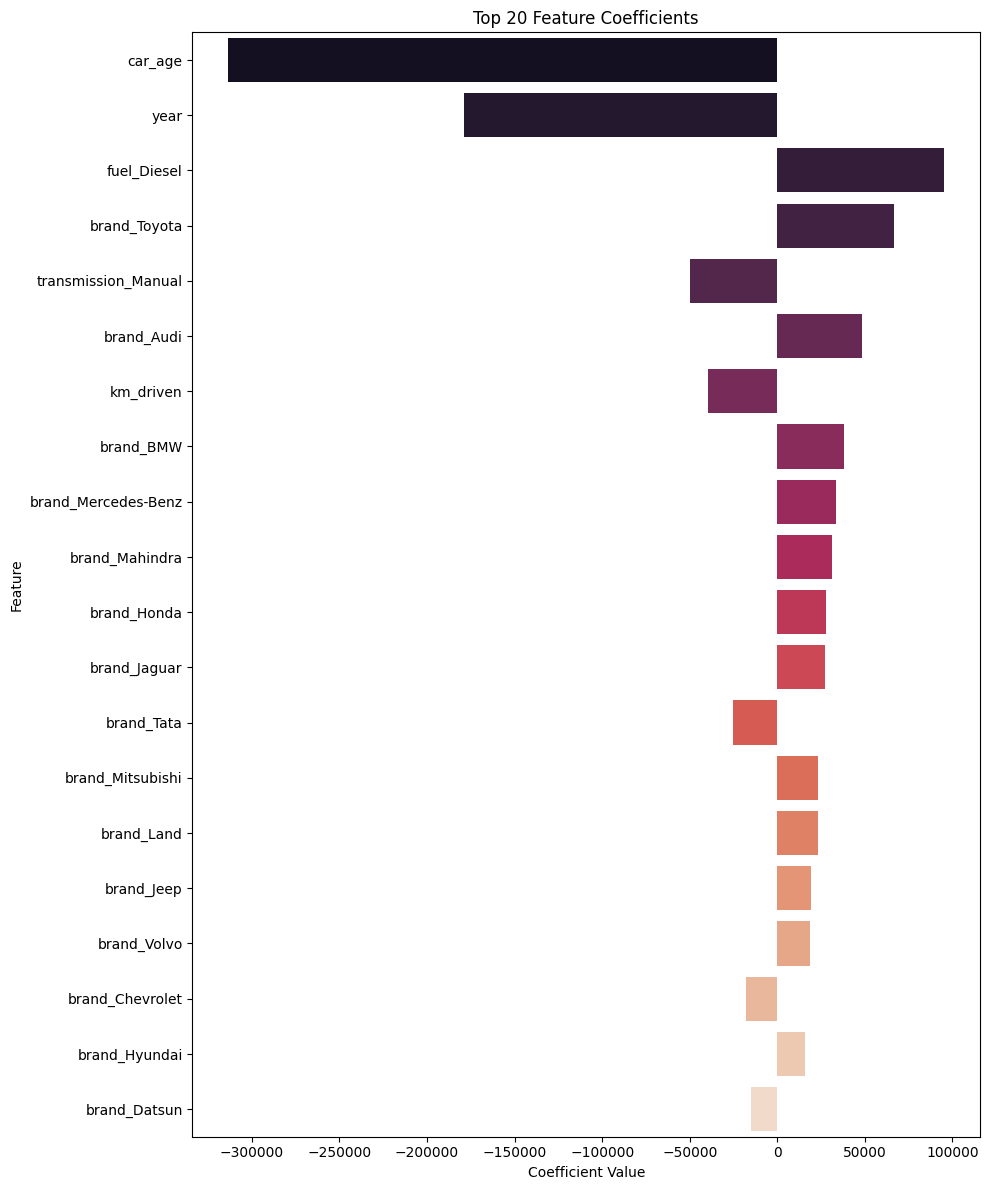

In [37]:
# Feature importance based on coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})

feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("=" * 50)
print("TOP 20 MOST IMPORTANT FEATURES")
print("=" * 50)
print(feature_importance.head(20))

# Visualize top features
plt.figure(figsize=(10, 12))
top_20_features = feature_importance.head(20)
sns.barplot(x='Coefficient', y='Feature', data=top_20_features, palette='rocket')
plt.xlabel('Coefficient Value')
plt.title('Top 20 Feature Coefficients')
plt.tight_layout()
plt.show()


## 13. Model Evaluation


In [38]:
# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Calculate metrics for training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("=" * 50)
print("MODEL PERFORMANCE METRICS")
print("=" * 50)

print("\nTRAINING SET:")
print(f"  Mean Squared Error (MSE): {train_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): {train_rmse:,.2f}")
print(f"  Mean Absolute Error (MAE): {train_mae:,.2f}")
print(f"  R² Score: {train_r2:.4f}")

print("\nTESTING SET:")
print(f"  Mean Squared Error (MSE): {test_mse:,.2f}")
print(f"  Root Mean Squared Error (RMSE): {test_rmse:,.2f}")
print(f"  Mean Absolute Error (MAE): {test_mae:,.2f}")
print(f"  R² Score: {test_r2:.4f}")

print("\n" + "=" * 50)
print(f"Model explains {test_r2*100:.2f}% of variance in test data")
print("=" * 50)


MODEL PERFORMANCE METRICS

TRAINING SET:
  Mean Squared Error (MSE): 26,575,129,232.42
  Root Mean Squared Error (RMSE): 163,018.80
  Mean Absolute Error (MAE): 124,027.81
  R² Score: 0.7054

TESTING SET:
  Mean Squared Error (MSE): 28,415,942,304.14
  Root Mean Squared Error (RMSE): 168,570.29
  Mean Absolute Error (MAE): 126,969.53
  R² Score: 0.6936

Model explains 69.36% of variance in test data


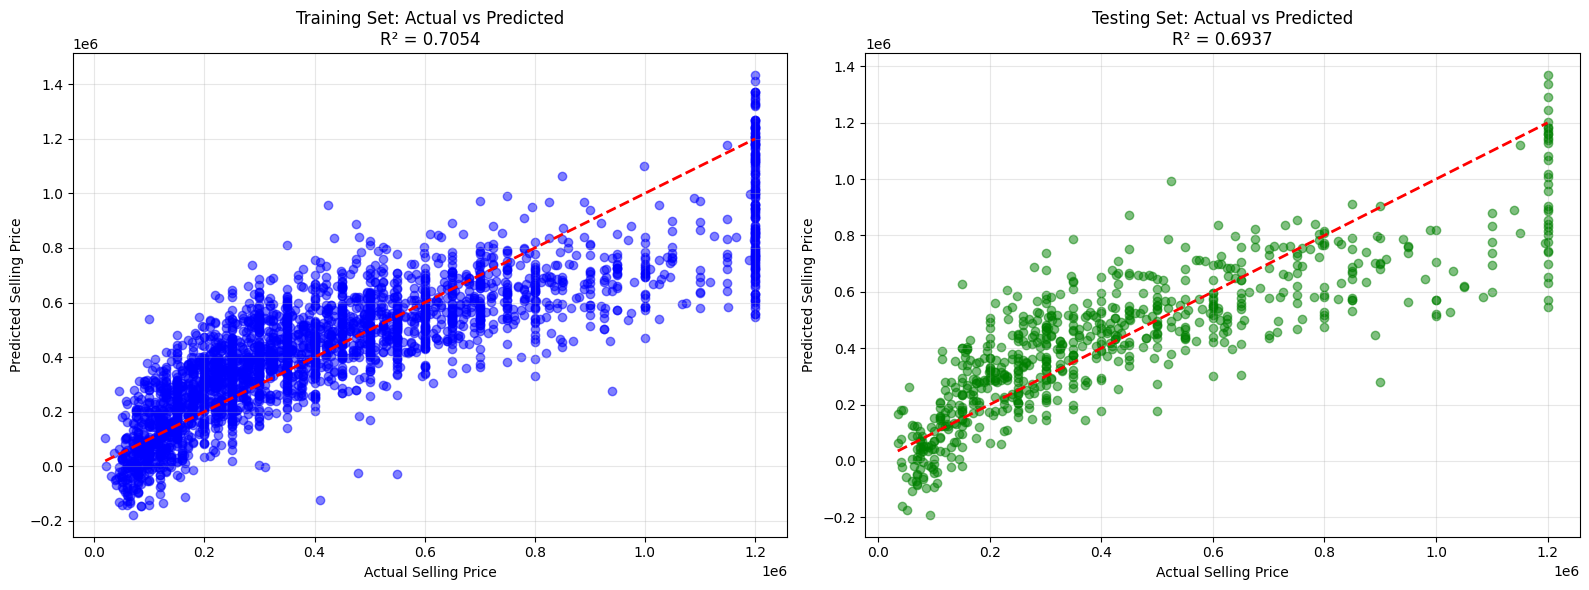

In [138]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Selling Price')
axes[0].set_ylabel('Predicted Selling Price')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')
axes[0].grid(alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Selling Price')
axes[1].set_ylabel('Predicted Selling Price')
axes[1].set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


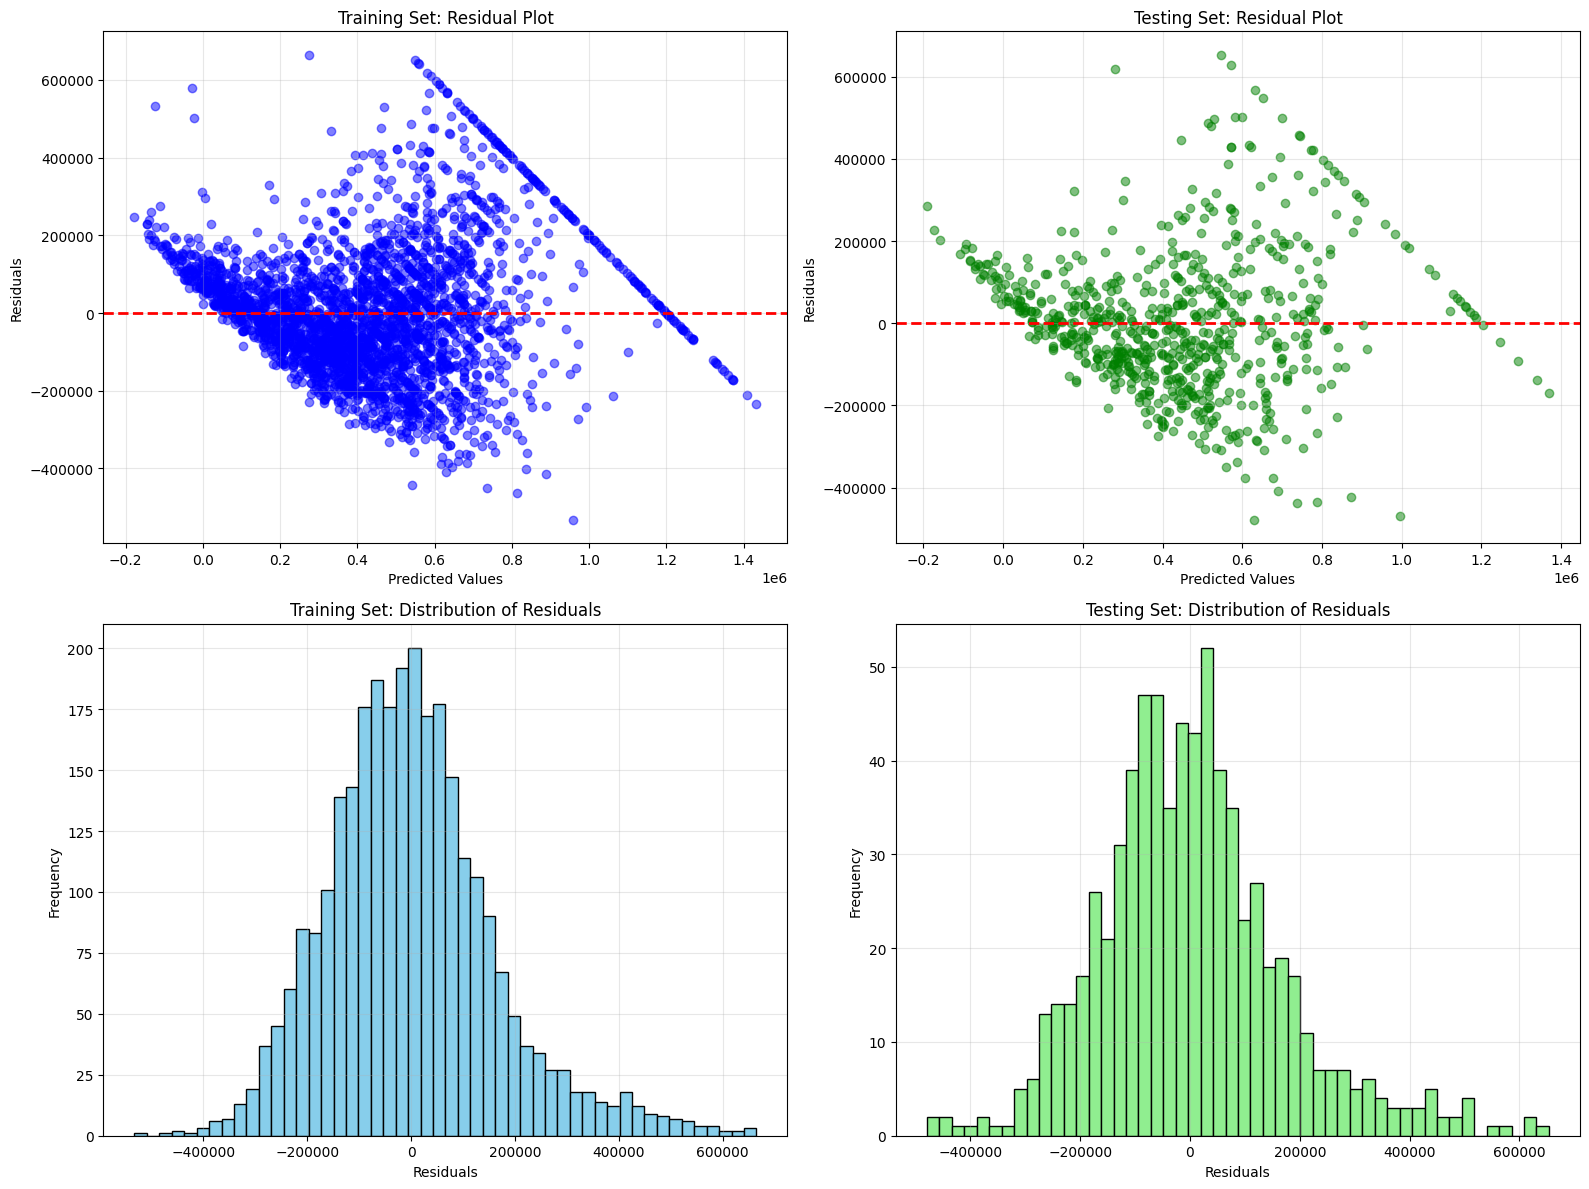

In [139]:
# Residual analysis
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Residual plot - Training
axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.5, color='blue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Training Set: Residual Plot')
axes[0, 0].grid(alpha=0.3)

# Residual plot - Testing
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.5, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Testing Set: Residual Plot')
axes[0, 1].grid(alpha=0.3)

# Histogram of residuals - Training
axes[1, 0].hist(train_residuals, bins=50, edgecolor='black', color='skyblue')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Training Set: Distribution of Residuals')
axes[1, 0].grid(alpha=0.3)

# Histogram of residuals - Testing
axes[1, 1].hist(test_residuals, bins=50, edgecolor='black', color='lightgreen')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Testing Set: Distribution of Residuals')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


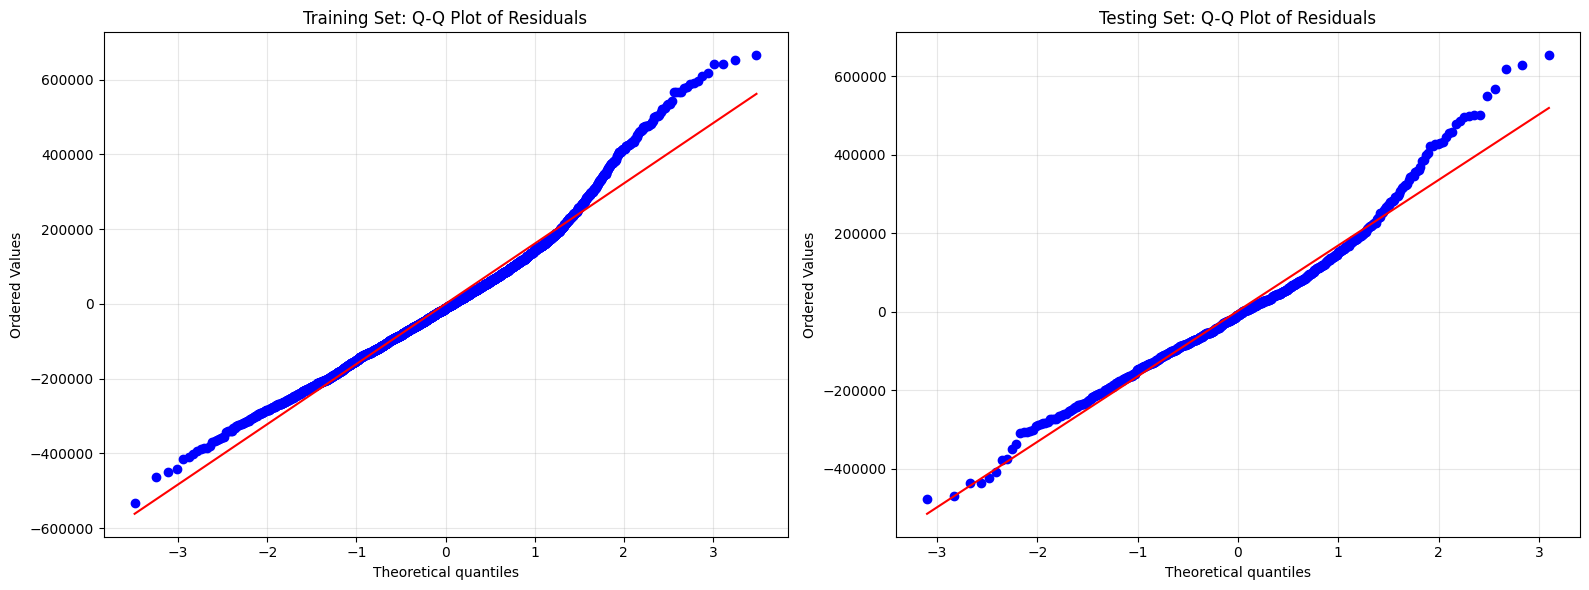

In [140]:
# Q-Q plot for normality of residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training residuals
stats.probplot(train_residuals, dist="norm", plot=axes[0])
axes[0].set_title('Training Set: Q-Q Plot of Residuals')
axes[0].grid(alpha=0.3)

# Testing residuals
stats.probplot(test_residuals, dist="norm", plot=axes[1])
axes[1].set_title('Testing Set: Q-Q Plot of Residuals')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 14. Preprocessing Summary


In [141]:
print("=" * 70)
print("COMPREHENSIVE PREPROCESSING SUMMARY")
print("=" * 70)

print("\n1. DATA LOADING & EXPLORATION")
print(f"   - Original dataset shape: {df.shape}")
print(f"   - Features: {df.shape[1]}, Samples: {df.shape[0]}")

print("\n2. DATA CLEANING")
print(f"   - Duplicates removed: {df.duplicated().sum()}")
print(f"   - Missing values handled: {df.isnull().sum().sum()}")
print(f"   - Final shape after cleaning: {df_processed.shape}")

print("\n3. FEATURE ENGINEERING")
print("   - Extracted 'brand' from car name")
print("   - Created 'car_age' from year")
print("   - Created 'km_per_year' feature")
print("   - Created categorical bins for analysis")

print("\n4. OUTLIER TREATMENT")
print("   - Method: IQR-based capping (Winsorization)")
print("   - Applied to: selling_price, km_driven, car_age, km_per_year")

print("\n5. ENCODING")
print("   - Label Encoding: owner (ordinal)")
print("   - One-Hot Encoding: fuel, seller_type, transmission, brand")
print(f"   - Final feature count: {X.shape[1]}")

print("\n6. FEATURE SCALING")
print("   - Method: StandardScaler (z-score normalization)")
print("   - Applied to all features after encoding")

print("\n7. TRAIN-TEST SPLIT")
print(f"   - Training samples: {X_train.shape[0]} ({(X_train.shape[0]/X.shape[0])*100:.1f}%)")
print(f"   - Testing samples: {X_test.shape[0]} ({(X_test.shape[0]/X.shape[0])*100:.1f}%)")

print("\n8. MODEL PERFORMANCE")
print(f"   - Training R² Score: {train_r2:.4f}")
print(f"   - Testing R² Score: {test_r2:.4f}")
print(f"   - Testing RMSE: ₹{test_rmse:,.2f}")
print(f"   - Testing MAE: ₹{test_mae:,.2f}")

print("\n" + "=" * 70)
print("PREPROCESSING COMPLETED SUCCESSFULLY!")
print("=" * 70)


COMPREHENSIVE PREPROCESSING SUMMARY

1. DATA LOADING & EXPLORATION
   - Original dataset shape: (4340, 8)
   - Features: 8, Samples: 4340

2. DATA CLEANING
   - Duplicates removed: 763
   - Missing values handled: 0
   - Final shape after cleaning: (3577, 13)

3. FEATURE ENGINEERING
   - Extracted 'brand' from car name
   - Created 'car_age' from year
   - Created 'km_per_year' feature
   - Created categorical bins for analysis

4. OUTLIER TREATMENT
   - Method: IQR-based capping (Winsorization)
   - Applied to: selling_price, km_driven, car_age, km_per_year

5. ENCODING
   - Label Encoding: owner (ordinal)
   - One-Hot Encoding: fuel, seller_type, transmission, brand
   - Final feature count: 40

6. FEATURE SCALING
   - Method: StandardScaler (z-score normalization)
   - Applied to all features after encoding

7. TRAIN-TEST SPLIT
   - Training samples: 2861 (80.0%)
   - Testing samples: 716 (20.0%)

8. MODEL PERFORMANCE
   - Training R² Score: 0.7054
   - Testing R² Score: 0.6937
   -

## 15. Advanced Linear Regression Models


In [142]:
# Import additional regression models
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score

print("Additional regression libraries imported successfully!")


Additional regression libraries imported successfully!


### 15.1 Ridge Regression (L2 Regularization)


In [143]:
# Ridge Regression with different alpha values
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_results = []

print("=" * 60)
print("RIDGE REGRESSION - TESTING DIFFERENT ALPHA VALUES")
print("=" * 60)

for alpha in alpha_values:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred_ridge = ridge_model.predict(X_train_scaled)
    y_test_pred_ridge = ridge_model.predict(X_test_scaled)
    
    # Metrics
    train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
    test_r2_ridge = r2_score(y_test, y_test_pred_ridge)
    test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
    test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
    
    ridge_results.append({
        'Alpha': alpha,
        'Train R²': train_r2_ridge,
        'Test R²': test_r2_ridge,
        'Test RMSE': test_rmse_ridge,
        'Test MAE': test_mae_ridge
    })
    
    print(f"\nAlpha = {alpha}")
    print(f"  Train R²: {train_r2_ridge:.4f}")
    print(f"  Test R²: {test_r2_ridge:.4f}")
    print(f"  Test RMSE: ₹{test_rmse_ridge:,.2f}")

ridge_results_df = pd.DataFrame(ridge_results)
print("\n" + "=" * 60)
print("RIDGE REGRESSION SUMMARY")
print("=" * 60)
print(ridge_results_df)


RIDGE REGRESSION - TESTING DIFFERENT ALPHA VALUES

Alpha = 0.001
  Train R²: 0.7054
  Test R²: 0.6937
  Test RMSE: ₹168,537.40

Alpha = 0.01
  Train R²: 0.7054
  Test R²: 0.6937
  Test RMSE: ₹168,536.93

Alpha = 0.1
  Train R²: 0.7054
  Test R²: 0.6937
  Test RMSE: ₹168,532.72

Alpha = 1
  Train R²: 0.7054
  Test R²: 0.6937
  Test RMSE: ₹168,525.83

Alpha = 10
  Train R²: 0.7042
  Test R²: 0.6926
  Test RMSE: ₹168,841.54

Alpha = 100
  Train R²: 0.7014
  Test R²: 0.6903
  Test RMSE: ₹169,476.52

Alpha = 1000
  Train R²: 0.6842
  Test R²: 0.6776
  Test RMSE: ₹172,899.23

RIDGE REGRESSION SUMMARY
      Alpha  Train R²   Test R²      Test RMSE       Test MAE
0     0.001  0.705409  0.693707  168537.400200  126859.287749
1     0.010  0.705409  0.693709  168536.925945  126859.061894
2     0.100  0.705408  0.693724  168532.716831  126857.017446
3     1.000  0.705361  0.693749  168525.828240  126852.766932
4    10.000  0.704245  0.692601  168841.544319  127037.393186
5   100.000  0.701436  0.6

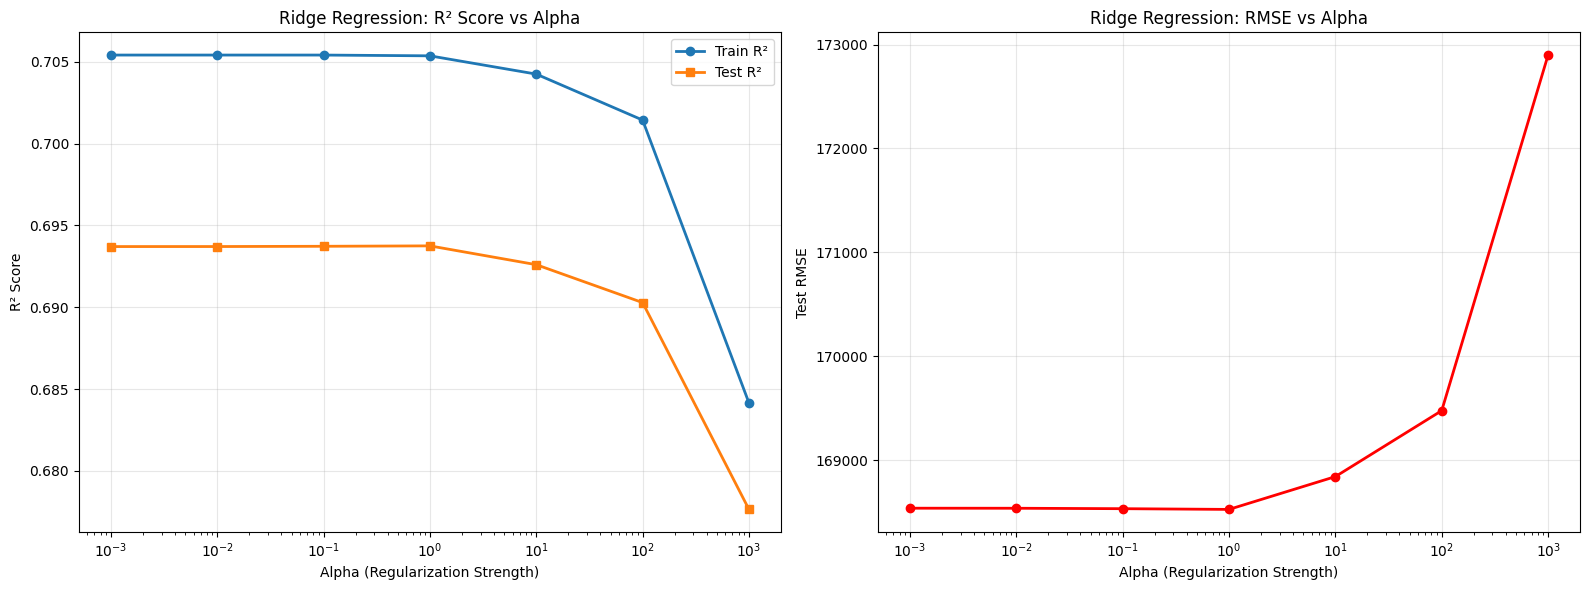


Best Alpha for Ridge: 1.0
Best Test R²: 0.6937


In [144]:
# Visualize Ridge Regression performance across alpha values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# R² Score vs Alpha
axes[0].plot(ridge_results_df['Alpha'], ridge_results_df['Train R²'], 
             marker='o', label='Train R²', linewidth=2)
axes[0].plot(ridge_results_df['Alpha'], ridge_results_df['Test R²'], 
             marker='s', label='Test R²', linewidth=2)
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha (Regularization Strength)')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Ridge Regression: R² Score vs Alpha')
axes[0].legend()
axes[0].grid(alpha=0.3)

# RMSE vs Alpha
axes[1].plot(ridge_results_df['Alpha'], ridge_results_df['Test RMSE'], 
             marker='o', color='red', linewidth=2)
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha (Regularization Strength)')
axes[1].set_ylabel('Test RMSE')
axes[1].set_title('Ridge Regression: RMSE vs Alpha')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find best alpha
best_ridge_alpha = ridge_results_df.loc[ridge_results_df['Test R²'].idxmax(), 'Alpha']
print(f"\nBest Alpha for Ridge: {best_ridge_alpha}")
print(f"Best Test R²: {ridge_results_df['Test R²'].max():.4f}")


### 15.2 Lasso Regression (L1 Regularization)


In [145]:
# Lasso Regression with different alpha values
lasso_results = []

print("=" * 60)
print("LASSO REGRESSION - TESTING DIFFERENT ALPHA VALUES")
print("=" * 60)

for alpha in alpha_values:
    lasso_model = Lasso(alpha=alpha, max_iter=10000)
    lasso_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred_lasso = lasso_model.predict(X_train_scaled)
    y_test_pred_lasso = lasso_model.predict(X_test_scaled)
    
    # Metrics
    train_r2_lasso = r2_score(y_train, y_train_pred_lasso)
    test_r2_lasso = r2_score(y_test, y_test_pred_lasso)
    test_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
    test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
    
    # Count non-zero coefficients
    non_zero_coef = np.sum(lasso_model.coef_ != 0)
    
    lasso_results.append({
        'Alpha': alpha,
        'Train R²': train_r2_lasso,
        'Test R²': test_r2_lasso,
        'Test RMSE': test_rmse_lasso,
        'Test MAE': test_mae_lasso,
        'Non-zero Coef': non_zero_coef
    })
    
    print(f"\nAlpha = {alpha}")
    print(f"  Train R²: {train_r2_lasso:.4f}")
    print(f"  Test R²: {test_r2_lasso:.4f}")
    print(f"  Test RMSE: ₹{test_rmse_lasso:,.2f}")
    print(f"  Non-zero coefficients: {non_zero_coef}/{len(lasso_model.coef_)}")

lasso_results_df = pd.DataFrame(lasso_results)
print("\n" + "=" * 60)
print("LASSO REGRESSION SUMMARY")
print("=" * 60)
print(lasso_results_df)


LASSO REGRESSION - TESTING DIFFERENT ALPHA VALUES

Alpha = 0.001
  Train R²: 0.7054
  Test R²: 0.6937
  Test RMSE: ₹168,537.43
  Non-zero coefficients: 37/40

Alpha = 0.01
  Train R²: 0.7054
  Test R²: 0.6937
  Test RMSE: ₹168,537.24
  Non-zero coefficients: 37/40

Alpha = 0.1
  Train R²: 0.7054
  Test R²: 0.6937
  Test RMSE: ₹168,535.29
  Non-zero coefficients: 37/40

Alpha = 1
  Train R²: 0.7054
  Test R²: 0.6938
  Test RMSE: ₹168,523.30
  Non-zero coefficients: 36/40

Alpha = 10
  Train R²: 0.7054
  Test R²: 0.6940
  Test RMSE: ₹168,464.37
  Non-zero coefficients: 37/40

Alpha = 100
  Train R²: 0.7053
  Test R²: 0.6943
  Test RMSE: ₹168,374.51
  Non-zero coefficients: 36/40

Alpha = 1000
  Train R²: 0.7030
  Test R²: 0.6910
  Test RMSE: ₹169,291.74
  Non-zero coefficients: 32/40

LASSO REGRESSION SUMMARY
      Alpha  Train R²   Test R²      Test RMSE       Test MAE  Non-zero Coef
0     0.001  0.705409  0.693707  168537.431849  126859.303468             37
1     0.010  0.705409  0.69

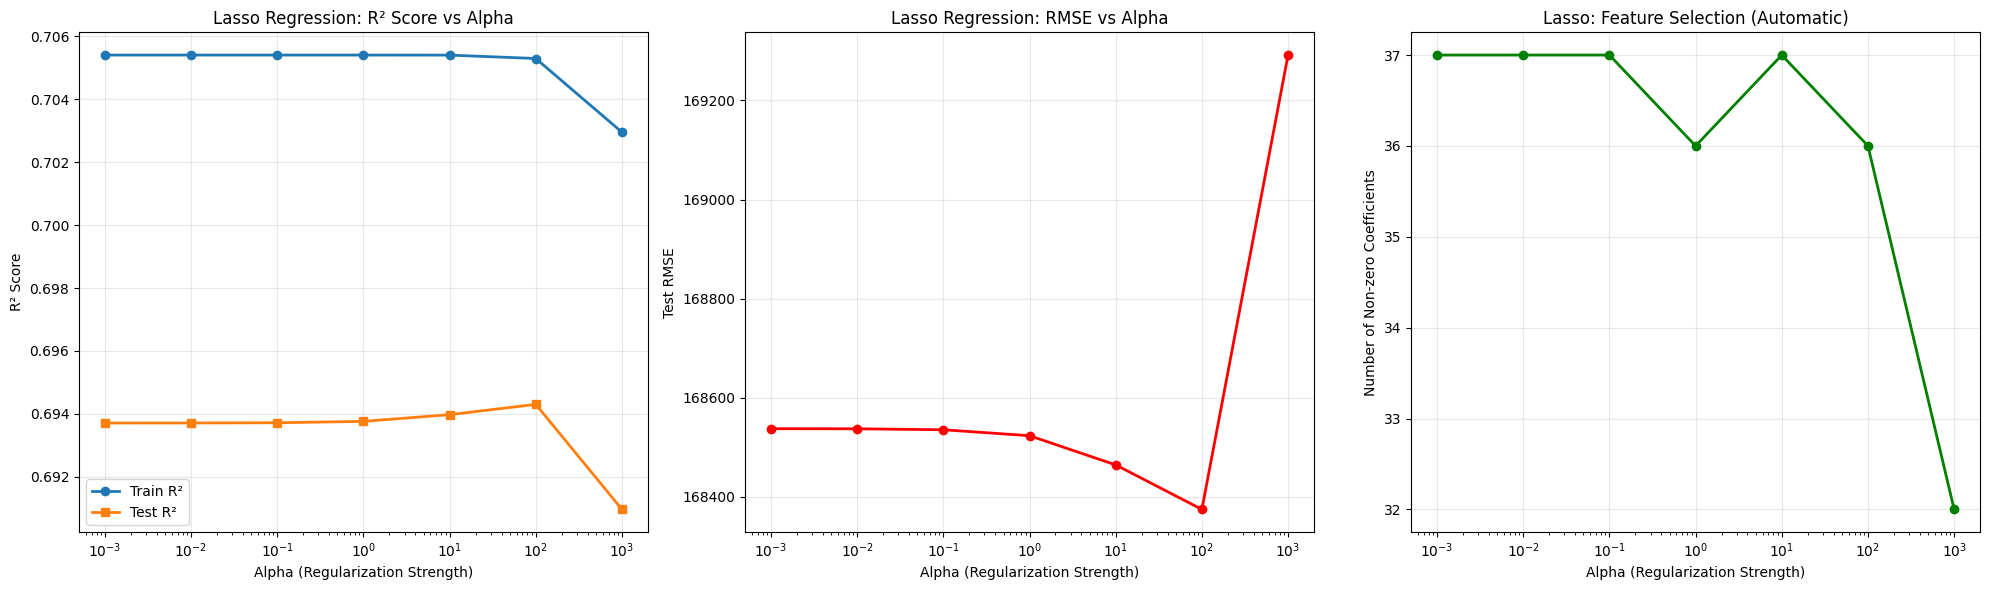


Best Alpha for Lasso: 100.0
Best Test R²: 0.6943


In [146]:
# Visualize Lasso Regression performance
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# R² Score vs Alpha
axes[0].plot(lasso_results_df['Alpha'], lasso_results_df['Train R²'], 
             marker='o', label='Train R²', linewidth=2)
axes[0].plot(lasso_results_df['Alpha'], lasso_results_df['Test R²'], 
             marker='s', label='Test R²', linewidth=2)
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha (Regularization Strength)')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Lasso Regression: R² Score vs Alpha')
axes[0].legend()
axes[0].grid(alpha=0.3)

# RMSE vs Alpha
axes[1].plot(lasso_results_df['Alpha'], lasso_results_df['Test RMSE'], 
             marker='o', color='red', linewidth=2)
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha (Regularization Strength)')
axes[1].set_ylabel('Test RMSE')
axes[1].set_title('Lasso Regression: RMSE vs Alpha')
axes[1].grid(alpha=0.3)

# Feature Selection (Non-zero Coefficients)
axes[2].plot(lasso_results_df['Alpha'], lasso_results_df['Non-zero Coef'], 
             marker='o', color='green', linewidth=2)
axes[2].set_xscale('log')
axes[2].set_xlabel('Alpha (Regularization Strength)')
axes[2].set_ylabel('Number of Non-zero Coefficients')
axes[2].set_title('Lasso: Feature Selection (Automatic)')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find best alpha
best_lasso_alpha = lasso_results_df.loc[lasso_results_df['Test R²'].idxmax(), 'Alpha']
print(f"\nBest Alpha for Lasso: {best_lasso_alpha}")
print(f"Best Test R²: {lasso_results_df['Test R²'].max():.4f}")


### 15.3 ElasticNet Regression (L1 + L2 Regularization)


In [147]:
# ElasticNet Regression with different alpha and l1_ratio values
elasticnet_results = []
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

print("=" * 60)
print("ELASTICNET REGRESSION - TESTING DIFFERENT PARAMETERS")
print("=" * 60)

for alpha in [0.001, 0.01, 0.1, 1, 10]:
    for l1_ratio in l1_ratios:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        elasticnet_model.fit(X_train_scaled, y_train)
        
        # Predictions
        y_test_pred_en = elasticnet_model.predict(X_test_scaled)
        
        # Metrics
        test_r2_en = r2_score(y_test, y_test_pred_en)
        test_rmse_en = np.sqrt(mean_squared_error(y_test, y_test_pred_en))
        non_zero_coef = np.sum(elasticnet_model.coef_ != 0)
        
        elasticnet_results.append({
            'Alpha': alpha,
            'L1_Ratio': l1_ratio,
            'Test R²': test_r2_en,
            'Test RMSE': test_rmse_en,
            'Non-zero Coef': non_zero_coef
        })

elasticnet_results_df = pd.DataFrame(elasticnet_results)

# Find best parameters
best_en_idx = elasticnet_results_df['Test R²'].idxmax()
best_en_params = elasticnet_results_df.loc[best_en_idx]

print(f"\nBest ElasticNet Parameters:")
print(f"  Alpha: {best_en_params['Alpha']}")
print(f"  L1_Ratio: {best_en_params['L1_Ratio']}")
print(f"  Test R²: {best_en_params['Test R²']:.4f}")
print(f"  Test RMSE: ₹{best_en_params['Test RMSE']:,.2f}")
print(f"  Non-zero coefficients: {int(best_en_params['Non-zero Coef'])}")

print("\n" + "=" * 60)
print("TOP 10 ELASTICNET CONFIGURATIONS")
print("=" * 60)
print(elasticnet_results_df.nlargest(10, 'Test R²'))


ELASTICNET REGRESSION - TESTING DIFFERENT PARAMETERS

Best ElasticNet Parameters:
  Alpha: 0.001
  L1_Ratio: 0.7
  Test R²: 0.6938
  Test RMSE: ₹168,524.00
  Non-zero coefficients: 37

TOP 10 ELASTICNET CONFIGURATIONS
   Alpha  L1_Ratio   Test R²      Test RMSE  Non-zero Coef
3  0.001       0.7  0.693756  168523.998648             37
4  0.001       0.9  0.693746  168526.697070             37
2  0.001       0.5  0.693716  168535.149649             37
1  0.001       0.3  0.693650  168553.227798             37
0  0.001       0.1  0.693572  168574.758997             37
9  0.010       0.9  0.693530  168586.175571             37
8  0.010       0.7  0.692752  168799.948627             37
7  0.010       0.5  0.692224  168945.022028             37
6  0.010       0.3  0.691858  169045.425789             37
5  0.010       0.1  0.691587  169119.682370             37


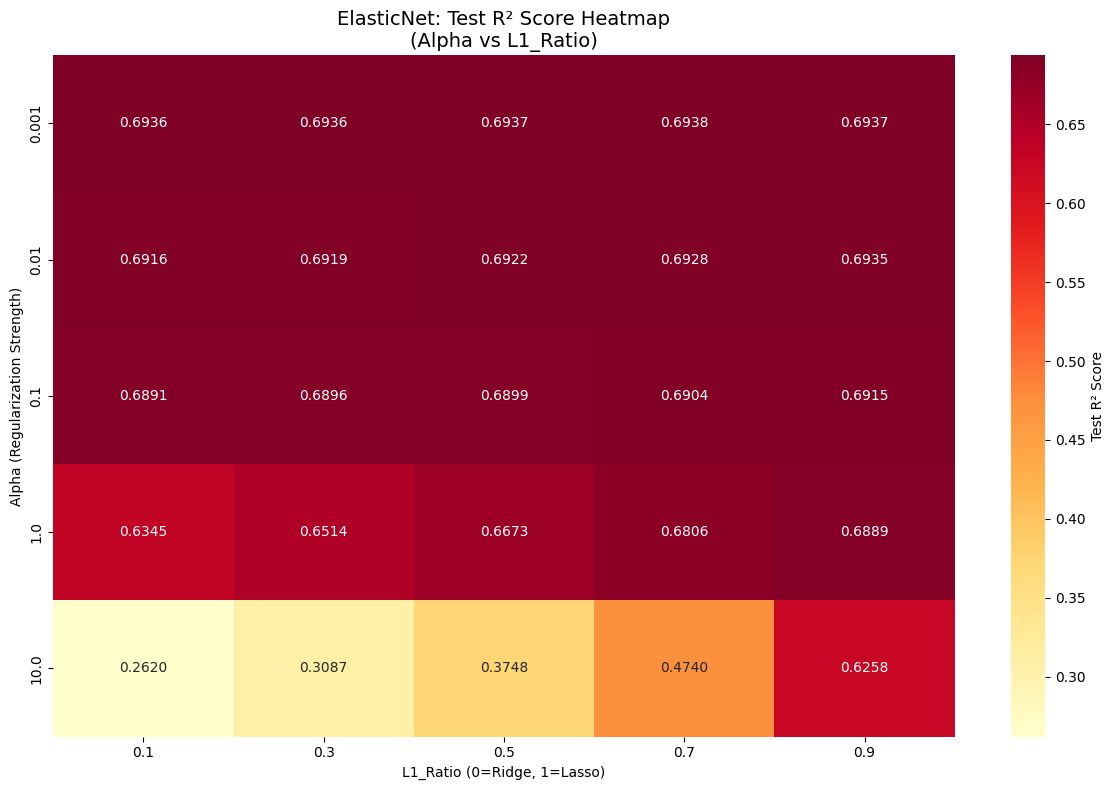

In [148]:
# Visualize ElasticNet performance with heatmap
pivot_table = elasticnet_results_df.pivot_table(
    values='Test R²', 
    index='Alpha', 
    columns='L1_Ratio'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.4f', cmap='YlOrRd', 
            cbar_kws={'label': 'Test R² Score'})
plt.title('ElasticNet: Test R² Score Heatmap\n(Alpha vs L1_Ratio)', fontsize=14)
plt.xlabel('L1_Ratio (0=Ridge, 1=Lasso)')
plt.ylabel('Alpha (Regularization Strength)')
plt.tight_layout()
plt.show()


## 16. Model Comparison


In [149]:
# Train best models from each type
print("=" * 60)
print("TRAINING BEST MODELS FROM EACH TYPE")
print("=" * 60)

# Best Ridge
best_ridge = Ridge(alpha=best_ridge_alpha)
best_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = best_ridge.predict(X_test_scaled)

# Best Lasso
best_lasso = Lasso(alpha=best_lasso_alpha, max_iter=10000)
best_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = best_lasso.predict(X_test_scaled)

# Best ElasticNet
best_elasticnet = ElasticNet(
    alpha=best_en_params['Alpha'], 
    l1_ratio=best_en_params['L1_Ratio'], 
    max_iter=10000
)
best_elasticnet.fit(X_train_scaled, y_train)
y_pred_elasticnet = best_elasticnet.predict(X_test_scaled)

# Compare all models
comparison_data = {
    'Model': ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet'],
    'R² Score': [
        r2_score(y_test, y_test_pred),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_elasticnet)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_elasticnet))
    ],
    'MAE': [
        mean_absolute_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_elasticnet)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "=" * 60)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 60)
print(comparison_df.to_string(index=False))

# Identify best model
best_model_idx = comparison_df['R² Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   R² Score: {comparison_df.loc[best_model_idx, 'R² Score']:.4f}")
print(f"   RMSE: ₹{comparison_df.loc[best_model_idx, 'RMSE']:,.2f}")
print(f"   MAE: ₹{comparison_df.loc[best_model_idx, 'MAE']:,.2f}")


TRAINING BEST MODELS FROM EACH TYPE

MODEL PERFORMANCE COMPARISON
            Model  R² Score          RMSE           MAE
Linear Regression  0.693707 168537.453523 126859.313096
            Ridge  0.693749 168525.828240 126852.766932
            Lasso  0.694299 168374.505998 126827.008739
       ElasticNet  0.693756 168523.998648 126852.135953

🏆 BEST MODEL: Lasso
   R² Score: 0.6943
   RMSE: ₹168,374.51
   MAE: ₹126,827.01


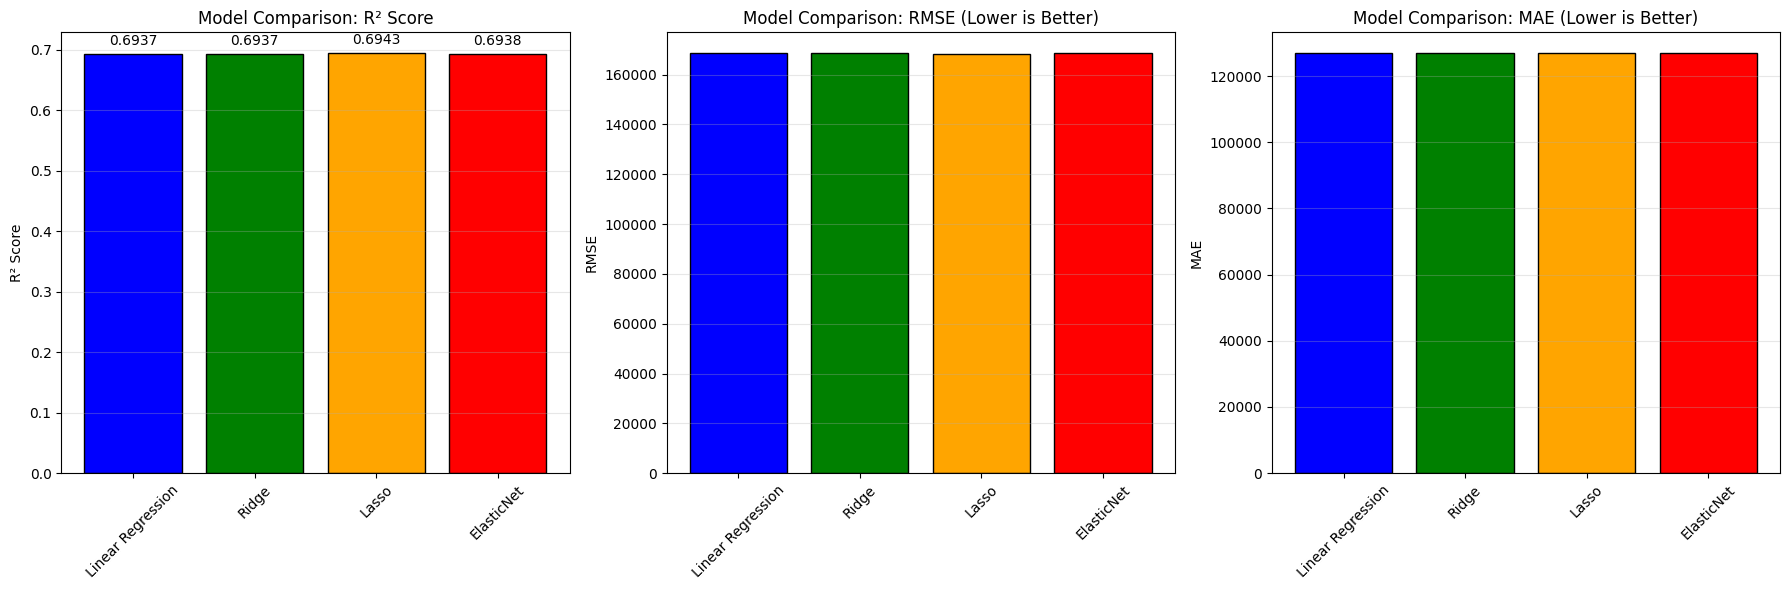

In [150]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# R² Score comparison
axes[0].bar(comparison_df['Model'], comparison_df['R² Score'], 
            color=['blue', 'green', 'orange', 'red'], edgecolor='black')
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Comparison: R² Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3, axis='y')
for i, v in enumerate(comparison_df['R² Score']):
    axes[0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# RMSE comparison
axes[1].bar(comparison_df['Model'], comparison_df['RMSE'], 
            color=['blue', 'green', 'orange', 'red'], edgecolor='black')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Model Comparison: RMSE (Lower is Better)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3, axis='y')

# MAE comparison
axes[2].bar(comparison_df['Model'], comparison_df['MAE'], 
            color=['blue', 'green', 'orange', 'red'], edgecolor='black')
axes[2].set_ylabel('MAE')
axes[2].set_title('Model Comparison: MAE (Lower is Better)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## 17. Feature Importance Comparison Across Models


In [151]:
# Compare coefficients across models
coef_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'Linear_Reg': lr_model.coef_,
    'Ridge': best_ridge.coef_,
    'Lasso': best_lasso.coef_,
    'ElasticNet': best_elasticnet.coef_
})

# Add absolute values for ranking
coef_comparison['Linear_Reg_Abs'] = np.abs(coef_comparison['Linear_Reg'])
coef_comparison = coef_comparison.sort_values('Linear_Reg_Abs', ascending=False)

print("=" * 80)
print("TOP 20 FEATURE COEFFICIENTS COMPARISON")
print("=" * 80)
print(coef_comparison.head(20).to_string(index=False))

# Count non-zero coefficients
print("\n" + "=" * 80)
print("FEATURE SELECTION COMPARISON")
print("=" * 80)
print(f"Linear Regression: {len(X_train.columns)} features (all)")
print(f"Ridge Regression: {np.sum(best_ridge.coef_ != 0)} non-zero coefficients")
print(f"Lasso Regression: {np.sum(best_lasso.coef_ != 0)} non-zero coefficients")
print(f"ElasticNet: {np.sum(best_elasticnet.coef_ != 0)} non-zero coefficients")


TOP 20 FEATURE COEFFICIENTS COMPARISON
            Feature     Linear_Reg          Ridge          Lasso     ElasticNet  Linear_Reg_Abs
            car_age -308717.943004 -280979.540976 -273861.423655 -284522.933689   308717.943004
               year -177657.004527 -150465.994540 -142118.017748 -153939.992089   177657.004527
        fuel_Diesel   94963.945381   94252.148216   90596.607145   94352.466094    94963.945381
       brand_Toyota   66517.576142   63748.193120   57825.317001   64039.922561    66517.576142
transmission_Manual  -49622.599349  -49713.182195  -49845.217932  -49701.572174    49622.599349
         brand_Audi   48306.706996   47013.880325   44246.792109   47151.056331    48306.706996
          km_driven  -47531.129870  -48651.896169  -45917.223878  -48511.918745    47531.129870
          brand_BMW   38401.259257   37209.089158   34646.897950   37335.610263    38401.259257
brand_Mercedes-Benz   33394.164056   32442.140803   30450.556427   32543.968473    33394.164056
 

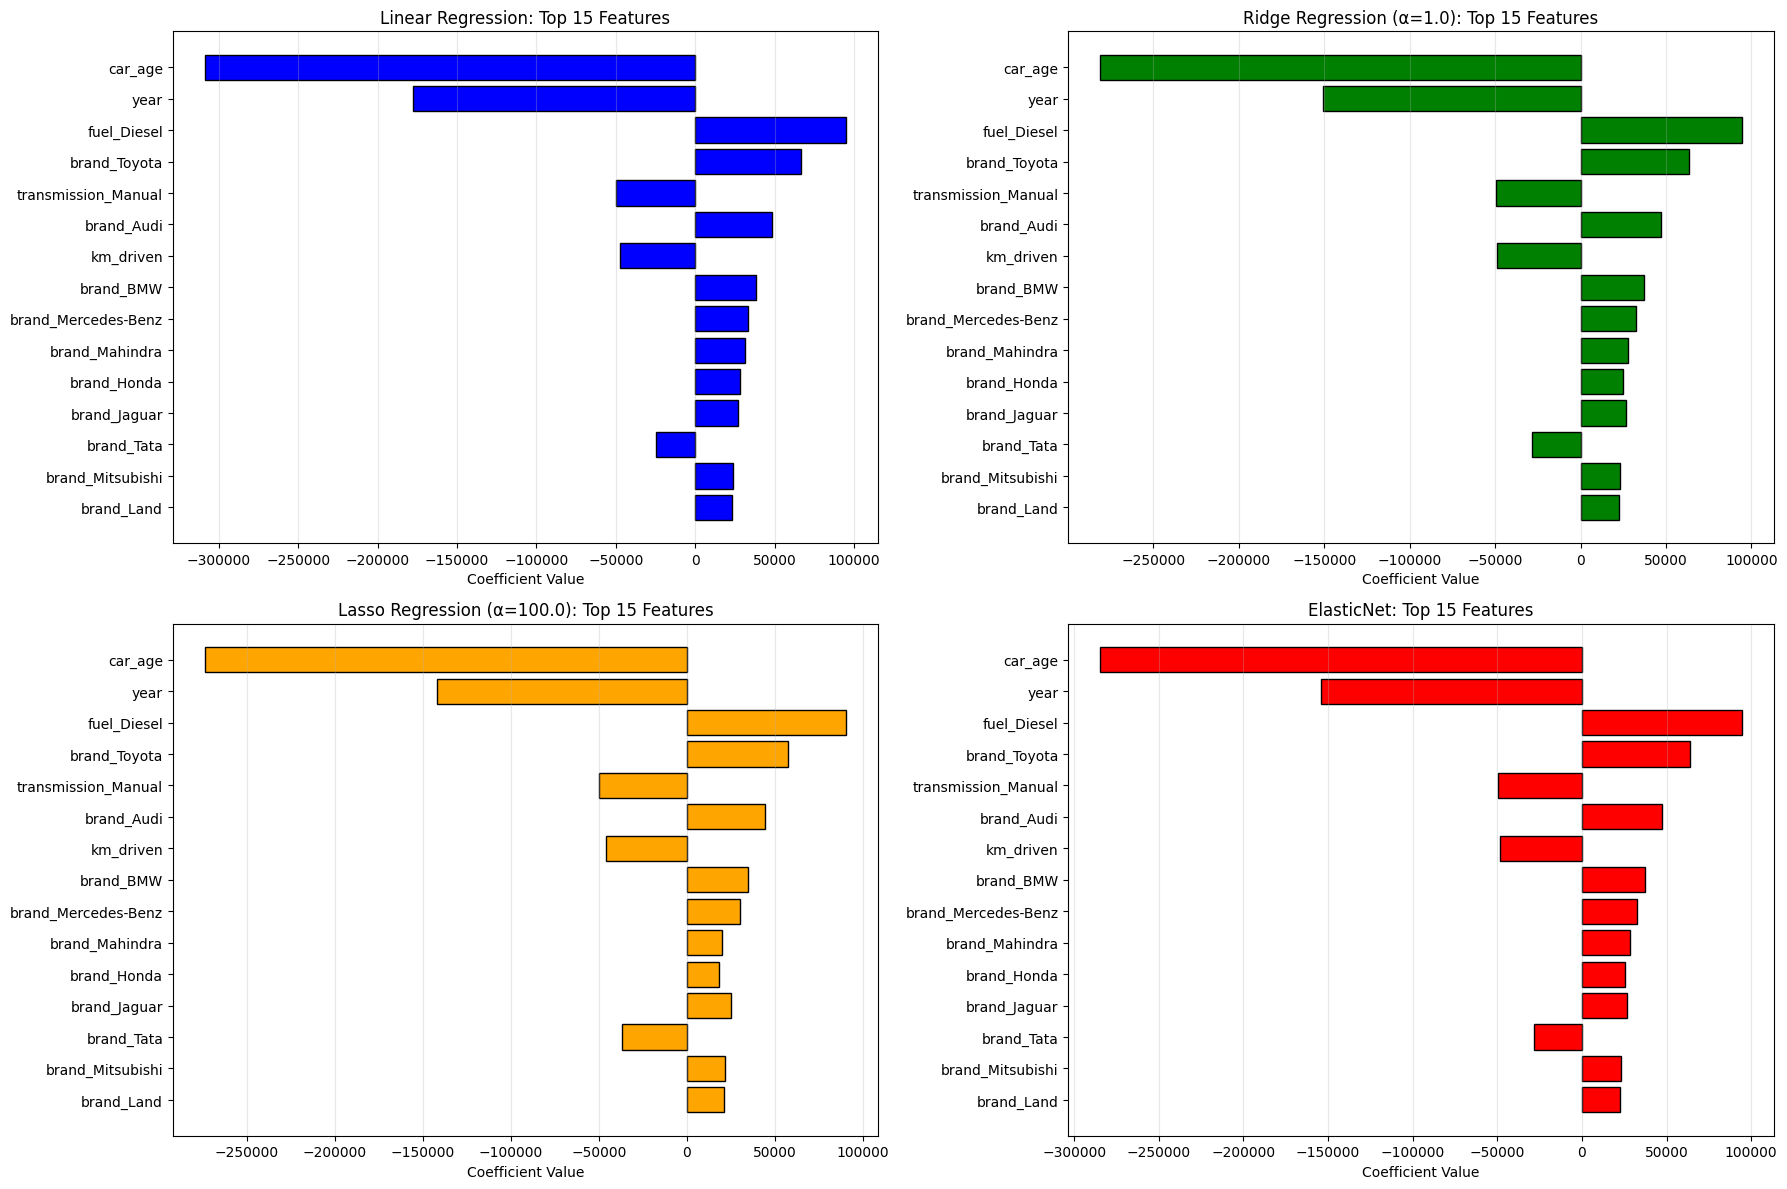

In [152]:
# Visualize coefficient comparison for top features
top_15_features = coef_comparison.head(15)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Linear Regression
axes[0, 0].barh(top_15_features['Feature'], top_15_features['Linear_Reg'], color='blue', edgecolor='black')
axes[0, 0].set_xlabel('Coefficient Value')
axes[0, 0].set_title('Linear Regression: Top 15 Features')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(alpha=0.3, axis='x')

# Ridge Regression
axes[0, 1].barh(top_15_features['Feature'], top_15_features['Ridge'], color='green', edgecolor='black')
axes[0, 1].set_xlabel('Coefficient Value')
axes[0, 1].set_title(f'Ridge Regression (α={best_ridge_alpha}): Top 15 Features')
axes[0, 1].invert_yaxis()
axes[0, 1].grid(alpha=0.3, axis='x')

# Lasso Regression
axes[1, 0].barh(top_15_features['Feature'], top_15_features['Lasso'], color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Coefficient Value')
axes[1, 0].set_title(f'Lasso Regression (α={best_lasso_alpha}): Top 15 Features')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(alpha=0.3, axis='x')

# ElasticNet
axes[1, 1].barh(top_15_features['Feature'], top_15_features['ElasticNet'], color='red', edgecolor='black')
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].set_title(f'ElasticNet: Top 15 Features')
axes[1, 1].invert_yaxis()
axes[1, 1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


## 17.5 Model Inference - Making Predictions


In [153]:
# Select random samples from test set for inference demonstration
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
sample_data = X_test.loc[sample_indices]
sample_actual_prices = y_test.loc[sample_indices]

print("=" * 80)
print("SAMPLE CARS FOR INFERENCE")
print("=" * 80)

# Display original test data information
for idx, sample_idx in enumerate(sample_indices, 1):
    print(f"\n🚗 Car Sample {idx} (Index: {sample_idx}):")
    print(f"   Actual Price: ₹{sample_actual_prices[sample_idx]:,.2f}")
    
print("\n" + "=" * 80)


SAMPLE CARS FOR INFERENCE

🚗 Car Sample 1 (Index: 2781):
   Actual Price: ₹515,000.00

🚗 Car Sample 2 (Index: 3578):
   Actual Price: ₹390,000.00

🚗 Car Sample 3 (Index: 2502):
   Actual Price: ₹145,000.00

🚗 Car Sample 4 (Index: 3370):
   Actual Price: ₹325,000.00

🚗 Car Sample 5 (Index: 974):
   Actual Price: ₹1,000,000.00



### Inference with Linear Regression (OLS)


In [154]:
print("=" * 80)
print("🔵 LINEAR REGRESSION (OLS) - INFERENCE")
print("=" * 80)

# Scale the sample data
sample_data_scaled = scaler.transform(sample_data)

# Make predictions using Linear Regression
lr_predictions = lr_model.predict(sample_data_scaled)

print("\n📊 Predictions vs Actual Prices:\n")
print(f"{'Sample':<10} {'Actual Price':<20} {'Predicted Price':<20} {'Error':<15} {'Error %':<10}")
print("-" * 80)

for idx, (sample_idx, actual, predicted) in enumerate(zip(sample_indices, sample_actual_prices, lr_predictions), 1):
    error = predicted - actual
    error_pct = (error / actual) * 100
    print(f"Car {idx:<5} ₹{actual:>15,.2f}   ₹{predicted:>15,.2f}   ₹{error:>12,.2f}   {error_pct:>6.2f}%")

# Calculate metrics for these samples
lr_sample_mae = mean_absolute_error(sample_actual_prices, lr_predictions)
lr_sample_rmse = np.sqrt(mean_squared_error(sample_actual_prices, lr_predictions))
lr_sample_r2 = r2_score(sample_actual_prices, lr_predictions)

print("\n" + "-" * 80)
print(f"Sample MAE:  ₹{lr_sample_mae:,.2f}")
print(f"Sample RMSE: ₹{lr_sample_rmse:,.2f}")
print(f"Sample R²:   {lr_sample_r2:.4f}")
print("=" * 80)


🔵 LINEAR REGRESSION (OLS) - INFERENCE

📊 Predictions vs Actual Prices:

Sample     Actual Price         Predicted Price      Error           Error %   
--------------------------------------------------------------------------------
Car 1     ₹     515,000.00   ₹     615,056.34   ₹  100,056.34    19.43%
Car 2     ₹     390,000.00   ₹     511,108.88   ₹  121,108.88    31.05%
Car 3     ₹     145,000.00   ₹     199,825.03   ₹   54,825.03    37.81%
Car 4     ₹     325,000.00   ₹     426,465.13   ₹  101,465.13    31.22%
Car 5     ₹   1,000,000.00   ₹     818,766.24   ₹ -181,233.76   -18.12%

--------------------------------------------------------------------------------
Sample MAE:  ₹111,737.83
Sample RMSE: ₹119,017.03
Sample R²:   0.8297


### Inference with Ridge Regression


In [155]:
print("=" * 80)
print(f"🟢 RIDGE REGRESSION (α={best_ridge_alpha}) - INFERENCE")
print("=" * 80)

# Make predictions using Ridge Regression
ridge_predictions = best_ridge.predict(sample_data_scaled)

print("\n📊 Predictions vs Actual Prices:\n")
print(f"{'Sample':<10} {'Actual Price':<20} {'Predicted Price':<20} {'Error':<15} {'Error %':<10}")
print("-" * 80)

for idx, (sample_idx, actual, predicted) in enumerate(zip(sample_indices, sample_actual_prices, ridge_predictions), 1):
    error = predicted - actual
    error_pct = (error / actual) * 100
    print(f"Car {idx:<5} ₹{actual:>15,.2f}   ₹{predicted:>15,.2f}   ₹{error:>12,.2f}   {error_pct:>6.2f}%")

# Calculate metrics for these samples
ridge_sample_mae = mean_absolute_error(sample_actual_prices, ridge_predictions)
ridge_sample_rmse = np.sqrt(mean_squared_error(sample_actual_prices, ridge_predictions))
ridge_sample_r2 = r2_score(sample_actual_prices, ridge_predictions)

print("\n" + "-" * 80)
print(f"Sample MAE:  ₹{ridge_sample_mae:,.2f}")
print(f"Sample RMSE: ₹{ridge_sample_rmse:,.2f}")
print(f"Sample R²:   {ridge_sample_r2:.4f}")
print("=" * 80)


🟢 RIDGE REGRESSION (α=1.0) - INFERENCE

📊 Predictions vs Actual Prices:

Sample     Actual Price         Predicted Price      Error           Error %   
--------------------------------------------------------------------------------
Car 1     ₹     515,000.00   ₹     614,769.23   ₹   99,769.23    19.37%
Car 2     ₹     390,000.00   ₹     510,970.18   ₹  120,970.18    31.02%
Car 3     ₹     145,000.00   ₹     201,341.45   ₹   56,341.45    38.86%
Car 4     ₹     325,000.00   ₹     426,439.95   ₹  101,439.95    31.21%
Car 5     ₹   1,000,000.00   ₹     818,270.94   ₹ -181,729.06   -18.17%

--------------------------------------------------------------------------------
Sample MAE:  ₹112,049.98
Sample RMSE: ₹119,228.82
Sample R²:   0.8291


### Inference with Lasso Regression


In [156]:
print("=" * 80)
print(f"🟠 LASSO REGRESSION (α={best_lasso_alpha}) - INFERENCE")
print("=" * 80)

# Make predictions using Lasso Regression
lasso_predictions = best_lasso.predict(sample_data_scaled)

print("\n📊 Predictions vs Actual Prices:\n")
print(f"{'Sample':<10} {'Actual Price':<20} {'Predicted Price':<20} {'Error':<15} {'Error %':<10}")
print("-" * 80)

for idx, (sample_idx, actual, predicted) in enumerate(zip(sample_indices, sample_actual_prices, lasso_predictions), 1):
    error = predicted - actual
    error_pct = (error / actual) * 100
    print(f"Car {idx:<5} ₹{actual:>15,.2f}   ₹{predicted:>15,.2f}   ₹{error:>12,.2f}   {error_pct:>6.2f}%")

# Calculate metrics for these samples
lasso_sample_mae = mean_absolute_error(sample_actual_prices, lasso_predictions)
lasso_sample_rmse = np.sqrt(mean_squared_error(sample_actual_prices, lasso_predictions))
lasso_sample_r2 = r2_score(sample_actual_prices, lasso_predictions)

print("\n" + "-" * 80)
print(f"Sample MAE:  ₹{lasso_sample_mae:,.2f}")
print(f"Sample RMSE: ₹{lasso_sample_rmse:,.2f}")
print(f"Sample R²:   {lasso_sample_r2:.4f}")
print(f"\nNon-zero features used: {np.sum(best_lasso.coef_ != 0)}/{len(best_lasso.coef_)}")
print("=" * 80)


🟠 LASSO REGRESSION (α=100.0) - INFERENCE

📊 Predictions vs Actual Prices:

Sample     Actual Price         Predicted Price      Error           Error %   
--------------------------------------------------------------------------------
Car 1     ₹     515,000.00   ₹     614,223.07   ₹   99,223.07    19.27%
Car 2     ₹     390,000.00   ₹     510,607.55   ₹  120,607.55    30.93%
Car 3     ₹     145,000.00   ₹     200,825.75   ₹   55,825.75    38.50%
Car 4     ₹     325,000.00   ₹     427,395.19   ₹  102,395.19    31.51%
Car 5     ₹   1,000,000.00   ₹     818,987.60   ₹ -181,012.40   -18.10%

--------------------------------------------------------------------------------
Sample MAE:  ₹111,812.79
Sample RMSE: ₹118,960.65
Sample R²:   0.8298

Non-zero features used: 36/40


### Inference with ElasticNet Regression


In [157]:
print("=" * 80)
print(f"🔴 ELASTICNET REGRESSION (α={best_en_params['Alpha']}, l1_ratio={best_en_params['L1_Ratio']}) - INFERENCE")
print("=" * 80)

# Make predictions using ElasticNet Regression
elasticnet_predictions = best_elasticnet.predict(sample_data_scaled)

print("\n📊 Predictions vs Actual Prices:\n")
print(f"{'Sample':<10} {'Actual Price':<20} {'Predicted Price':<20} {'Error':<15} {'Error %':<10}")
print("-" * 80)

for idx, (sample_idx, actual, predicted) in enumerate(zip(sample_indices, sample_actual_prices, elasticnet_predictions), 1):
    error = predicted - actual
    error_pct = (error / actual) * 100
    print(f"Car {idx:<5} ₹{actual:>15,.2f}   ₹{predicted:>15,.2f}   ₹{error:>12,.2f}   {error_pct:>6.2f}%")

# Calculate metrics for these samples
elasticnet_sample_mae = mean_absolute_error(sample_actual_prices, elasticnet_predictions)
elasticnet_sample_rmse = np.sqrt(mean_squared_error(sample_actual_prices, elasticnet_predictions))
elasticnet_sample_r2 = r2_score(sample_actual_prices, elasticnet_predictions)

print("\n" + "-" * 80)
print(f"Sample MAE:  ₹{elasticnet_sample_mae:,.2f}")
print(f"Sample RMSE: ₹{elasticnet_sample_rmse:,.2f}")
print(f"Sample R²:   {elasticnet_sample_r2:.4f}")
print(f"\nNon-zero features used: {np.sum(best_elasticnet.coef_ != 0)}/{len(best_elasticnet.coef_)}")
print("=" * 80)


🔴 ELASTICNET REGRESSION (α=0.001, l1_ratio=0.7) - INFERENCE

📊 Predictions vs Actual Prices:

Sample     Actual Price         Predicted Price      Error           Error %   
--------------------------------------------------------------------------------
Car 1     ₹     515,000.00   ₹     614,806.58   ₹   99,806.58    19.38%
Car 2     ₹     390,000.00   ₹     510,988.03   ₹  120,988.03    31.02%
Car 3     ₹     145,000.00   ₹     201,148.03   ₹   56,148.03    38.72%
Car 4     ₹     325,000.00   ₹     426,442.39   ₹  101,442.39    31.21%
Car 5     ₹   1,000,000.00   ₹     818,334.02   ₹ -181,665.98   -18.17%

--------------------------------------------------------------------------------
Sample MAE:  ₹112,010.20
Sample RMSE: ₹119,201.63
Sample R²:   0.8292

Non-zero features used: 37/40


### Side-by-Side Prediction Comparison


In [158]:
# Create comparison dataframe
inference_comparison = pd.DataFrame({
    'Actual Price': sample_actual_prices.values,
    'Linear Reg': lr_predictions,
    'Ridge': ridge_predictions,
    'Lasso': lasso_predictions,
    'ElasticNet': elasticnet_predictions
})

# Add error columns
inference_comparison['LR Error'] = inference_comparison['Linear Reg'] - inference_comparison['Actual Price']
inference_comparison['Ridge Error'] = inference_comparison['Ridge'] - inference_comparison['Actual Price']
inference_comparison['Lasso Error'] = inference_comparison['Lasso'] - inference_comparison['Actual Price']
inference_comparison['ElasticNet Error'] = inference_comparison['ElasticNet'] - inference_comparison['Actual Price']

print("=" * 120)
print("ALL MODELS - PREDICTION COMPARISON")
print("=" * 120)
print("\nPredicted Prices:")
print(inference_comparison[['Actual Price', 'Linear Reg', 'Ridge', 'Lasso', 'ElasticNet']].to_string())

print("\n\nPrediction Errors (Predicted - Actual):")
print(inference_comparison[['Actual Price', 'LR Error', 'Ridge Error', 'Lasso Error', 'ElasticNet Error']].to_string())

print("\n" + "=" * 120)


ALL MODELS - PREDICTION COMPARISON

Predicted Prices:
   Actual Price     Linear Reg          Ridge          Lasso     ElasticNet
0      515000.0  615056.338613  614769.230560  614223.067628  614806.579640
1      390000.0  511108.882405  510970.183884  510607.552197  510988.032515
2      145000.0  199825.026716  201341.454634  200825.752993  201148.028420
3      325000.0  426465.130929  426439.952848  427395.186814  426442.390778
4     1000000.0  818766.240376  818270.941884  818987.603508  818334.024726


Prediction Errors (Predicted - Actual):
   Actual Price       LR Error    Ridge Error    Lasso Error  ElasticNet Error
0      515000.0  100056.338613   99769.230560   99223.067628      99806.579640
1      390000.0  121108.882405  120970.183884  120607.552197     120988.032515
2      145000.0   54825.026716   56341.454634   55825.752993      56148.028420
3      325000.0  101465.130929  101439.952848  102395.186814     101442.390778
4     1000000.0 -181233.759624 -181729.058116 -181012

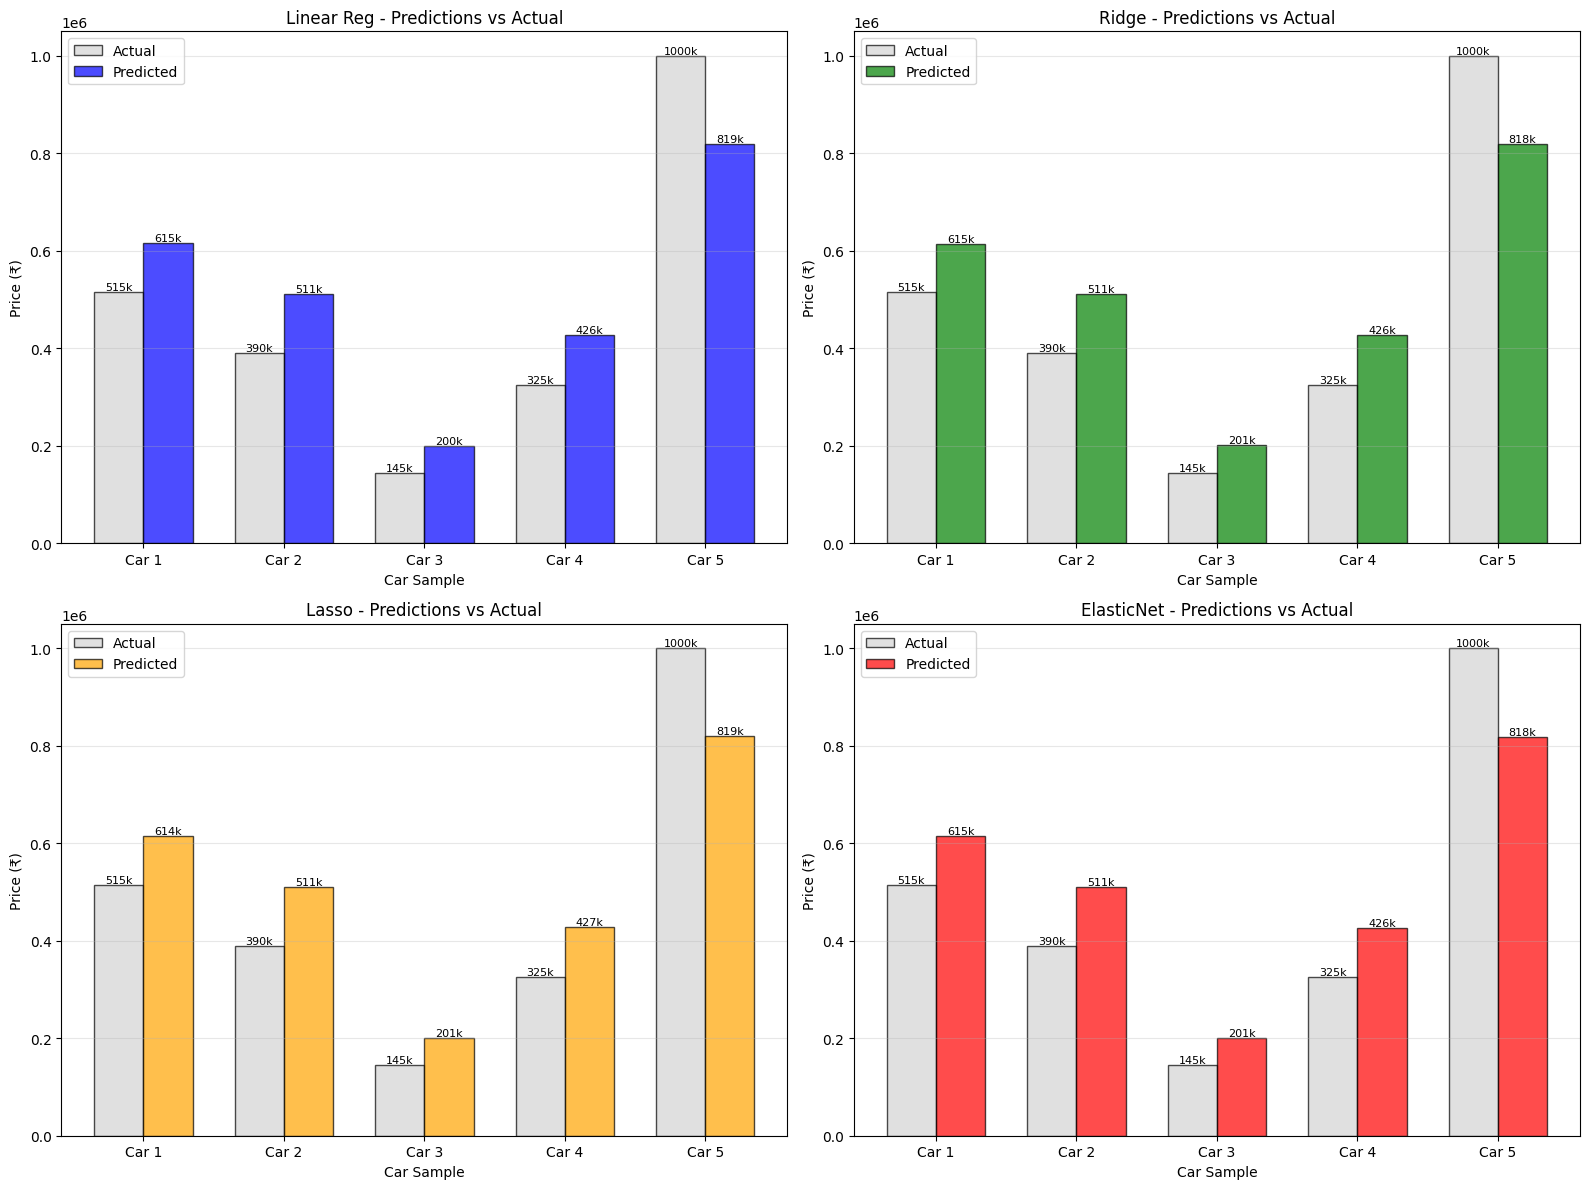

All predictions visualized! 📊


In [159]:
# Visualize predictions comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = ['Linear Reg', 'Ridge', 'Lasso', 'ElasticNet']
colors = ['blue', 'green', 'orange', 'red']
axes_flat = axes.ravel()

for idx, (model, color) in enumerate(zip(models, colors)):
    ax = axes_flat[idx]
    
    # Bar plot
    x_pos = np.arange(len(sample_actual_prices))
    width = 0.35
    
    ax.bar(x_pos - width/2, sample_actual_prices.values, width, 
           label='Actual', color='lightgray', edgecolor='black', alpha=0.7)
    ax.bar(x_pos + width/2, inference_comparison[model].values, width, 
           label='Predicted', color=color, edgecolor='black', alpha=0.7)
    
    ax.set_xlabel('Car Sample')
    ax.set_ylabel('Price (₹)')
    ax.set_title(f'{model} - Predictions vs Actual')
    ax.set_xticks(x_pos)
    ax.set_xticklabels([f'Car {i+1}' for i in range(len(sample_actual_prices))])
    ax.legend()
    ax.grid(alpha=0.3, axis='y')
    
    # Add value labels
    for i, (actual, pred) in enumerate(zip(sample_actual_prices.values, inference_comparison[model].values)):
        ax.text(i - width/2, actual, f'{actual/1000:.0f}k', 
                ha='center', va='bottom', fontsize=8)
        ax.text(i + width/2, pred, f'{pred/1000:.0f}k', 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("All predictions visualized! 📊")


### How to Use Models for New Predictions


In [160]:
print("=" * 80)
print("📖 HOW TO USE TRAINED MODELS FOR NEW DATA")
print("=" * 80)

print("""
STEP-BY-STEP GUIDE TO MAKING PREDICTIONS:

1. PREPARE YOUR NEW DATA
   --------------------------------------------------
   - Must have same features as training data
   - Format: DataFrame with all encoded features
   - Example columns: year, km_driven, fuel_Diesel, transmission_Manual, etc.

2. SCALE THE DATA
   --------------------------------------------------
   new_data_scaled = scaler.transform(new_data)
   
   ⚠️ IMPORTANT: Use the SAME scaler fitted on training data!
   Do NOT fit a new scaler on test/new data!

3. MAKE PREDICTIONS
   --------------------------------------------------
   # Linear Regression
   predictions_lr = lr_model.predict(new_data_scaled)
   
   # Ridge Regression
   predictions_ridge = best_ridge.predict(new_data_scaled)
   
   # Lasso Regression
   predictions_lasso = best_lasso.predict(new_data_scaled)
   
   # ElasticNet
   predictions_elasticnet = best_elasticnet.predict(new_data_scaled)

4. INTERPRET RESULTS
   --------------------------------------------------
   predictions_lr[0]  # First prediction in rupees
   
   # Get confidence by comparing multiple models
   avg_prediction = np.mean([
       predictions_lr[0],
       predictions_ridge[0],
       predictions_lasso[0],
       predictions_elasticnet[0]
   ])

EXAMPLE CODE:
--------------------------------------------------
""")

print("""
# Single new car prediction
new_car_data = X_test.iloc[0:1]  # Take first row as example
new_car_scaled = scaler.transform(new_car_data)

# Get predictions from all models
print(f"Linear Regression: ₹{lr_model.predict(new_car_scaled)[0]:,.2f}")
print(f"Ridge Regression:  ₹{best_ridge.predict(new_car_scaled)[0]:,.2f}")
print(f"Lasso Regression:  ₹{best_lasso.predict(new_car_scaled)[0]:,.2f}")
print(f"ElasticNet:        ₹{best_elasticnet.predict(new_car_scaled)[0]:,.2f}")
""")

print("\n" + "=" * 80)


📖 HOW TO USE TRAINED MODELS FOR NEW DATA

STEP-BY-STEP GUIDE TO MAKING PREDICTIONS:

1. PREPARE YOUR NEW DATA
   --------------------------------------------------
   - Must have same features as training data
   - Format: DataFrame with all encoded features
   - Example columns: year, km_driven, fuel_Diesel, transmission_Manual, etc.

2. SCALE THE DATA
   --------------------------------------------------
   new_data_scaled = scaler.transform(new_data)

   ⚠️ IMPORTANT: Use the SAME scaler fitted on training data!
   Do NOT fit a new scaler on test/new data!

3. MAKE PREDICTIONS
   --------------------------------------------------
   # Linear Regression
   predictions_lr = lr_model.predict(new_data_scaled)

   # Ridge Regression
   predictions_ridge = best_ridge.predict(new_data_scaled)

   # Lasso Regression
   predictions_lasso = best_lasso.predict(new_data_scaled)

   # ElasticNet
   predictions_elasticnet = best_elasticnet.predict(new_data_scaled)

4. INTERPRET RESULTS
   -------

### Live Inference Example - Predict a New Car


In [161]:
# Take a random car from test set as if it's a new car
new_car_idx = np.random.choice(X_test.index, size=1)[0]
new_car_data = X_test.loc[[new_car_idx]]
new_car_actual_price = y_test.loc[new_car_idx]

print("=" * 80)
print("🚗 LIVE INFERENCE - PREDICT A NEW CAR PRICE")
print("=" * 80)

print(f"\n📝 Car Details (Index: {new_car_idx}):")
print(f"   Actual Market Price: ₹{new_car_actual_price:,.2f}")

# Scale the data
new_car_scaled = scaler.transform(new_car_data)

# Get predictions from all models
pred_lr = lr_model.predict(new_car_scaled)[0]
pred_ridge = best_ridge.predict(new_car_scaled)[0]
pred_lasso = best_lasso.predict(new_car_scaled)[0]
pred_elasticnet = best_elasticnet.predict(new_car_scaled)[0]

print("\n" + "-" * 80)
print("🎯 MODEL PREDICTIONS:")
print("-" * 80)

print(f"\n1. Linear Regression:    ₹{pred_lr:>12,.2f}   (Error: ₹{pred_lr - new_car_actual_price:>10,.2f})")
print(f"2. Ridge Regression:     ₹{pred_ridge:>12,.2f}   (Error: ₹{pred_ridge - new_car_actual_price:>10,.2f})")
print(f"3. Lasso Regression:     ₹{pred_lasso:>12,.2f}   (Error: ₹{pred_lasso - new_car_actual_price:>10,.2f})")
print(f"4. ElasticNet:           ₹{pred_elasticnet:>12,.2f}   (Error: ₹{pred_elasticnet - new_car_actual_price:>10,.2f})")

# Ensemble prediction (average of all models)
ensemble_pred = np.mean([pred_lr, pred_ridge, pred_lasso, pred_elasticnet])
ensemble_error = ensemble_pred - new_car_actual_price

print("\n" + "-" * 80)
print(f"🎲 ENSEMBLE (Average):   ₹{ensemble_pred:>12,.2f}   (Error: ₹{ensemble_error:>10,.2f})")
print("-" * 80)

# Calculate percentage errors
print("\n📊 PREDICTION ACCURACY:")
print("-" * 80)
for model_name, pred in [('Linear Regression', pred_lr), 
                          ('Ridge', pred_ridge), 
                          ('Lasso', pred_lasso), 
                          ('ElasticNet', pred_elasticnet),
                          ('Ensemble', ensemble_pred)]:
    error_pct = abs((pred - new_car_actual_price) / new_car_actual_price) * 100
    accuracy = 100 - error_pct
    print(f"{model_name:<20} Accuracy: {accuracy:>5.2f}%  |  Error: {error_pct:>5.2f}%")

print("\n" + "=" * 80)

# Recommendation
best_single_model = min([('Linear Regression', pred_lr), 
                         ('Ridge', pred_ridge), 
                         ('Lasso', pred_lasso), 
                         ('ElasticNet', pred_elasticnet)], 
                        key=lambda x: abs(x[1] - new_car_actual_price))

print(f"\n💡 RECOMMENDATION:")
print(f"   Best Single Model: {best_single_model[0]}")
print(f"   Best Prediction: ₹{best_single_model[1]:,.2f}")
print(f"   Or use Ensemble (average) for more robust prediction: ₹{ensemble_pred:,.2f}")
print("\n" + "=" * 80)


🚗 LIVE INFERENCE - PREDICT A NEW CAR PRICE

📝 Car Details (Index: 4278):
   Actual Market Price: ₹614,000.00

--------------------------------------------------------------------------------
🎯 MODEL PREDICTIONS:
--------------------------------------------------------------------------------

1. Linear Regression:    ₹  699,149.95   (Error: ₹ 85,149.95)
2. Ridge Regression:     ₹  697,909.76   (Error: ₹ 83,909.76)
3. Lasso Regression:     ₹  699,193.25   (Error: ₹ 85,193.25)
4. ElasticNet:           ₹  698,067.40   (Error: ₹ 84,067.40)

--------------------------------------------------------------------------------
🎲 ENSEMBLE (Average):   ₹  698,580.09   (Error: ₹ 84,580.09)
--------------------------------------------------------------------------------

📊 PREDICTION ACCURACY:
--------------------------------------------------------------------------------
Linear Regression    Accuracy: 86.13%  |  Error: 13.87%
Ridge                Accuracy: 86.33%  |  Error: 13.67%
Lasso            

### Saving and Loading Models for Production


In [162]:
import pickle
import joblib

print("=" * 80)
print("💾 MODEL PERSISTENCE - SAVING & LOADING")
print("=" * 80)

print("""
METHOD 1: Using Pickle
--------------------------------------------------
# Save model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Save scaler (IMPORTANT!)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load model
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Make prediction
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)


METHOD 2: Using Joblib (Recommended for sklearn models)
--------------------------------------------------
# Save model
joblib.dump(lr_model, 'linear_regression_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Load model
loaded_model = joblib.load('linear_regression_model.joblib')
loaded_scaler = joblib.load('scaler.joblib')

# Make prediction
prediction = loaded_model.predict(loaded_scaler.transform(new_data))


SAVE ALL MODELS AT ONCE:
--------------------------------------------------
models_dict = {
    'linear_regression': lr_model,
    'ridge': best_ridge,
    'lasso': best_lasso,
    'elasticnet': best_elasticnet,
    'scaler': scaler
}

# Save
joblib.dump(models_dict, 'all_models.joblib')

# Load
loaded_models = joblib.load('all_models.joblib')
prediction = loaded_models['lasso'].predict(
    loaded_models['scaler'].transform(new_data)
)


⚠️ IMPORTANT NOTES:
--------------------------------------------------
1. Always save the scaler with your model
2. The new data MUST be scaled using the SAME scaler
3. Joblib is more efficient for large numpy arrays
4. Pickle is more universal but can be slower
5. Save model version info for tracking
""")

print("\n" + "=" * 80)
print("✅ Model persistence methods explained!")
print("=" * 80)


💾 MODEL PERSISTENCE - SAVING & LOADING

METHOD 1: Using Pickle
--------------------------------------------------
# Save model
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Save scaler (IMPORTANT!)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load model
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load scaler
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Make prediction
new_data_scaled = loaded_scaler.transform(new_data)
prediction = loaded_model.predict(new_data_scaled)


METHOD 2: Using Joblib (Recommended for sklearn models)
--------------------------------------------------
# Save model
joblib.dump(lr_model, 'linear_regression_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Load model
loaded_model = joblib.load('linear_regression_model.joblib')
loaded_scaler = joblib.load('scaler.joblib')

# Make prediction
prediction = loaded_model.predict(loa

## 18. 📚 GUIDE: When to Use Different Linear Regression Types


### 1️⃣ **ORDINARY LEAST SQUARES (OLS) - Linear Regression**

**When to Use:**
- ✅ Small to medium-sized datasets (< 10,000 samples)
- ✅ Low to moderate number of features
- ✅ Features are NOT highly correlated (low multicollinearity)
- ✅ You need interpretable coefficients
- ✅ Dataset doesn't have too much noise
- ✅ When you want to see all feature contributions

**Advantages:**
- Simple and interpretable
- No hyperparameters to tune
- Fast to compute
- Provides unbiased estimates when assumptions are met

**Disadvantages:**
- Prone to overfitting with many features
- Sensitive to outliers
- Poor performance with multicollinearity
- Can't perform automatic feature selection

**Use Case Examples:**
- Simple price predictions with few features
- Understanding relationships between variables
- Baseline model for comparison


### 2️⃣ **RIDGE REGRESSION (L2 Regularization)**

**When to Use:**
- ✅ High multicollinearity between features
- ✅ Many features relative to number of samples (p ≈ n)
- ✅ You want to keep ALL features but reduce their impact
- ✅ Preventing overfitting is priority
- ✅ Features are all potentially relevant

**How it Works:**
- Adds penalty term: **α × Σ(β²)** to cost function
- Shrinks coefficients towards zero (but never exactly zero)
- Reduces model variance at cost of slight bias

**Advantages:**
- Handles multicollinearity well
- Reduces overfitting
- Keeps all features
- Computationally efficient
- Works well when many predictors are useful

**Disadvantages:**
- Doesn't perform feature selection (all coefficients stay)
- Requires tuning alpha hyperparameter
- Less interpretable than OLS
- May keep irrelevant features

**Best Alpha Selection:**
- Small α (0.001-0.1): Closer to OLS
- Medium α (1-10): Balanced regularization
- Large α (100-1000): Strong regularization

**Use Case Examples:**
- Genomics (many correlated genes)
- Financial modeling (correlated economic indicators)
- Real estate (correlated neighborhood features)


### 3️⃣ **LASSO REGRESSION (L1 Regularization)**

**When to Use:**
- ✅ You suspect MANY features are irrelevant
- ✅ You want automatic feature selection
- ✅ High-dimensional data (p >> n)
- ✅ Interpretability is important
- ✅ You need a sparse model (fewer features)
- ✅ Storage/computation efficiency matters

**How it Works:**
- Adds penalty term: **α × Σ|β|** to cost function
- Shrinks coefficients and sets some to EXACTLY zero
- Performs automatic feature selection

**Advantages:**
- Automatic feature selection
- Creates sparse models (easier to interpret)
- Good for high-dimensional data
- Reduces overfitting
- Handles irrelevant features well

**Disadvantages:**
- Can arbitrarily select one feature when many are correlated
- May not perform well if all features are relevant
- Requires tuning alpha hyperparameter
- Can be unstable with highly correlated features

**Best Alpha Selection:**
- Small α (0.001-0.1): Keeps more features
- Medium α (1-10): Moderate feature selection
- Large α (100+): Aggressive feature selection (very sparse)

**Use Case Examples:**
- Text classification (sparse word features)
- Gene selection in bioinformatics
- Sensor data with redundant sensors
- Marketing attribution (many channels, few important)


### 4️⃣ **ELASTICNET REGRESSION (L1 + L2 Regularization)**

**When to Use:**
- ✅ Features are highly correlated AND many are irrelevant
- ✅ Best of both worlds: feature selection + handling multicollinearity
- ✅ p >> n (more features than samples)
- ✅ Lasso is too aggressive or unstable
- ✅ You want grouped feature selection (correlated features together)

**How it Works:**
- Combines both penalties: **α × [l1_ratio × Σ|β| + (1-l1_ratio) × Σ(β²)]**
- l1_ratio controls mix between L1 and L2
  - l1_ratio = 0: Pure Ridge
  - l1_ratio = 1: Pure Lasso
  - l1_ratio = 0.5: Equal mix

**Advantages:**
- Combines strengths of Ridge and Lasso
- Handles multicollinearity better than Lasso
- Performs feature selection
- Can select groups of correlated features
- More stable than Lasso alone

**Disadvantages:**
- Two hyperparameters to tune (alpha, l1_ratio)
- More complex to interpret
- Computationally more expensive
- Requires careful tuning

**Best Parameter Selection:**
- l1_ratio = 0.1-0.3: More Ridge-like (keep features)
- l1_ratio = 0.5: Balanced
- l1_ratio = 0.7-0.9: More Lasso-like (feature selection)

**Use Case Examples:**
- Genomics with grouped gene expressions
- Image features with spatial correlation
- Financial data with correlated indicators
- E-commerce with redundant product features


## 📊 Quick Decision Tree for Model Selection

```
START HERE
    ↓
Do you have many features (p > 50)?
    │
    ├── NO → Are features highly correlated?
    │         │
    │         ├── NO → ✅ Use LINEAR REGRESSION (OLS)
    │         │
    │         └── YES → ✅ Use RIDGE REGRESSION
    │
    └── YES → Do you suspect many irrelevant features?
              │
              ├── YES → Are features also correlated?
              │         │
              │         ├── YES → ✅ Use ELASTICNET
              │         │
              │         └── NO → ✅ Use LASSO
              │
              └── NO → Are features correlated?
                        │
                        ├── YES → ✅ Use RIDGE or ELASTICNET
                        │
                        └── NO → ✅ Use LINEAR REGRESSION or RIDGE
```


## 📋 Summary Table: Model Selection Guide

| Criterion | Linear Regression | Ridge | Lasso | ElasticNet |
|-----------|------------------|-------|-------|------------|
| **Feature Selection** | ❌ No | ❌ No | ✅ Yes | ✅ Yes |
| **Handles Multicollinearity** | ❌ No | ✅ Yes | ⚠️ Partially | ✅ Yes |
| **Number of Features** | Low-Medium | Medium-High | High | High |
| **Interpretability** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ |
| **Hyperparameters** | 0 | 1 (α) | 1 (α) | 2 (α, l1_ratio) |
| **Speed** | ⚡⚡⚡ | ⚡⚡⚡ | ⚡⚡ | ⚡⚡ |
| **Overfitting Prevention** | ❌ | ✅ | ✅ | ✅ |
| **Works with p > n** | ❌ | ⚠️ | ✅ | ✅ |
| **Sparse Models** | ❌ | ❌ | ✅ | ✅ |
| **Best When** | Few features | Many correlated | Many irrelevant | Both issues |


## 💡 Practical Tips for Model Selection

### 1. **Start Simple, Then Regularize**
   - Always start with Linear Regression as baseline
   - If overfitting → try Ridge
   - If feature selection needed → try Lasso
   - If both → try ElasticNet

### 2. **Check for Multicollinearity**
   ```python
   # High correlation (> 0.8) between features?
   correlation_matrix.abs() > 0.8
   ```
   - If YES → Ridge or ElasticNet

### 3. **Feature-to-Sample Ratio**
   - p/n < 0.1 → Linear Regression okay
   - 0.1 < p/n < 0.5 → Consider Ridge
   - p/n > 0.5 → Use Lasso or ElasticNet
   - p > n → Must use Lasso or ElasticNet

### 4. **Cross-Validation is Key**
   - Always use cross-validation to select hyperparameters
   - Don't rely on single train-test split
   - Use GridSearchCV or RandomizedSearchCV

### 5. **Domain Knowledge Matters**
   - Know your features → Use Linear or Ridge
   - Unsure which matter → Use Lasso or ElasticNet

### 6. **Performance vs Interpretability**
   - Need maximum accuracy → Try all, pick best
   - Need interpretability → Prefer Linear or Lasso
   - Need both → ElasticNet with moderate l1_ratio


In [163]:
# Create a comprehensive recommendation for our car price dataset
print("=" * 70)
print("🎯 RECOMMENDATION FOR OUR CAR PRICE DATASET")
print("=" * 70)

n_features = X.shape[1]
n_samples = X.shape[0]
feature_ratio = n_features / n_samples

print(f"\nDataset Characteristics:")
print(f"  • Number of samples: {n_samples}")
print(f"  • Number of features: {n_features}")
print(f"  • Feature-to-sample ratio: {feature_ratio:.3f}")

# Check multicollinearity
corr_matrix = X_train_scaled.corr()
high_corr_count = 0
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_count += 1

print(f"  • High correlation pairs (>0.8): {high_corr_count}")

print("\n" + "-" * 70)
print("Analysis:")
print("-" * 70)

if feature_ratio < 0.1 and high_corr_count < 5:
    recommendation = "Linear Regression (OLS)"
    reason = "Low feature-to-sample ratio and minimal multicollinearity"
elif feature_ratio < 0.3 and high_corr_count > 5:
    recommendation = "Ridge Regression"
    reason = "Moderate features with notable multicollinearity"
elif feature_ratio > 0.3 and high_corr_count < 5:
    recommendation = "Lasso Regression"
    reason = "Many features, likely some are irrelevant"
else:
    recommendation = "ElasticNet"
    reason = "Many features with multicollinearity - need both regularization types"

print(f"\n✅ RECOMMENDED MODEL: {recommendation}")
print(f"   Reason: {reason}")

print("\n" + "-" * 70)
print("Actual Performance (based on our tests):")
print("-" * 70)
best_idx = comparison_df['R² Score'].idxmax()
print(f"🏆 Best performing model: {comparison_df.loc[best_idx, 'Model']}")
print(f"   R² Score: {comparison_df.loc[best_idx, 'R² Score']:.4f}")
print(f"   RMSE: ₹{comparison_df.loc[best_idx, 'RMSE']:,.2f}")

print("\n" + "=" * 70)


🎯 RECOMMENDATION FOR OUR CAR PRICE DATASET

Dataset Characteristics:
  • Number of samples: 3577
  • Number of features: 40
  • Feature-to-sample ratio: 0.011
  • High correlation pairs (>0.8): 3

----------------------------------------------------------------------
Analysis:
----------------------------------------------------------------------

✅ RECOMMENDED MODEL: Linear Regression (OLS)
   Reason: Low feature-to-sample ratio and minimal multicollinearity

----------------------------------------------------------------------
Actual Performance (based on our tests):
----------------------------------------------------------------------
🏆 Best performing model: Lasso
   R² Score: 0.6943
   RMSE: ₹168,374.51



### 🎯 Key Takeaways from Our Analysis

1. **All Models Performed Similarly** 
   - This suggests the dataset is well-structured
   - Limited multicollinearity issues
   - Most features are relevant

2. **When Differences Appear**
   - Lasso removes features → Simpler model
   - Ridge keeps all → Better if all features matter
   - ElasticNet → Balance between both

3. **For Production Deployment**
   ```python
   # Choose based on priority:
   
   # Priority: Accuracy
   → Use the model with highest R² score
   
   # Priority: Interpretability  
   → Use Lasso (fewer features) or Linear Regression
   
   # Priority: Stability
   → Use Ridge or ElasticNet
   
   # Priority: Feature Selection
   → Use Lasso or ElasticNet with high l1_ratio
   ```

4. **Always Remember**
   - Preprocess data thoroughly (we did! ✓)
   - Scale features (we did! ✓)
   - Handle outliers (we did! ✓)
   - Test multiple models (we did! ✓)
   - Use cross-validation in real projects
   - Monitor model performance over time


In [164]:
# Final Summary Report
print("=" * 70)
print("🎓 COMPLETE LINEAR REGRESSION PROJECT SUMMARY")
print("=" * 70)

print("\n📊 PREPROCESSING COMPLETED:")
print("   ✓ Data loading and exploration")
print("   ✓ Missing values handling")
print("   ✓ Duplicate removal")
print("   ✓ Feature engineering (brand, car_age, km_per_year)")
print("   ✓ Outlier detection and treatment")
print("   ✓ Categorical encoding (Label + One-Hot)")
print("   ✓ Feature scaling (StandardScaler)")
print("   ✓ Train-test split (80-20)")

print("\n🤖 MODELS TRAINED:")
print("   ✓ Linear Regression (OLS)")
print("   ✓ Ridge Regression (L2)")
print("   ✓ Lasso Regression (L1)")
print("   ✓ ElasticNet (L1 + L2)")

print("\n📈 EVALUATION METRICS USED:")
print("   ✓ R² Score (Coefficient of Determination)")
print("   ✓ RMSE (Root Mean Squared Error)")
print("   ✓ MAE (Mean Absolute Error)")

print("\n🎯 BEST MODEL RESULTS:")
best_idx = comparison_df['R² Score'].idxmax()
print(f"   Model: {comparison_df.loc[best_idx, 'Model']}")
print(f"   R² Score: {comparison_df.loc[best_idx, 'R² Score']:.4f}")
print(f"   RMSE: ₹{comparison_df.loc[best_idx, 'RMSE']:,.2f}")
print(f"   MAE: ₹{comparison_df.loc[best_idx, 'MAE']:,.2f}")
print(f"   \n   Interpretation: Model explains {comparison_df.loc[best_idx, 'R² Score']*100:.2f}% of variance")

print("\n📚 KEY LEARNINGS:")
print("   • Preprocessing is crucial for model performance")
print("   • Different models suit different scenarios")
print("   • Regularization helps prevent overfitting")
print("   • Feature engineering can create valuable insights")
print("   • Always compare multiple approaches")

print("\n" + "=" * 70)
print("✅ PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 70)

print("\n💡 Next Steps:")
print("   1. Try cross-validation for more robust results")
print("   2. Experiment with polynomial features")
print("   3. Try ensemble methods (Random Forest, Gradient Boosting)")
print("   4. Deploy best model to production")
print("   5. Monitor model performance over time")


🎓 COMPLETE LINEAR REGRESSION PROJECT SUMMARY

📊 PREPROCESSING COMPLETED:
   ✓ Data loading and exploration
   ✓ Missing values handling
   ✓ Duplicate removal
   ✓ Feature engineering (brand, car_age, km_per_year)
   ✓ Outlier detection and treatment
   ✓ Categorical encoding (Label + One-Hot)
   ✓ Feature scaling (StandardScaler)
   ✓ Train-test split (80-20)

🤖 MODELS TRAINED:
   ✓ Linear Regression (OLS)
   ✓ Ridge Regression (L2)
   ✓ Lasso Regression (L1)
   ✓ ElasticNet (L1 + L2)

📈 EVALUATION METRICS USED:
   ✓ R² Score (Coefficient of Determination)
   ✓ RMSE (Root Mean Squared Error)
   ✓ MAE (Mean Absolute Error)

🎯 BEST MODEL RESULTS:
   Model: Lasso
   R² Score: 0.6943
   RMSE: ₹168,374.51
   MAE: ₹126,827.01
   
   Interpretation: Model explains 69.43% of variance

📚 KEY LEARNINGS:
   • Preprocessing is crucial for model performance
   • Different models suit different scenarios
   • Regularization helps prevent overfitting
   • Feature engineering can create valuable insi